# The Concrete Jungle - Machine Learning Project
**LL84 Greener, Greater Buildings Plan for NYC**
***
**[Introduction](#Introduction)**

**[Exploratory Data Analysis](#Exploratory-Data-Analysis)**

**[Feature Relationships](#Feature-Relationships)**

**[Correlations with Target Variable](#Correlations-with-Target-Variable)**

**[Feature Engineering and Selection](#Feature-Engineering-and-Selection)**

**[Machine Learning Model](#Machine-Learning)**

**[Model Optimization](#Model-Optimization)**

**[Model Interpretation](#Model-Interpretation)**

**[Extra Work](#Extra_Work)**

**[Conclusions](#Conclusions)**

## Introduction
***
I started this project with a goal of taking the 2021 NYC Benchmarking Law building energy usage data and do something with it. I originally attempted to clean and analyze this data set to try to find ways to reduce buildings' energy usage and subsequently their green house gas emissions. After a few iterations I thought it might be interesting to see if I could predict the buildings ENERGY STAR score by looking at their age, energy and water consumption as well as other energy consumption metrics.

At a high level, the purpose of this project is to explore the dataset, perform first order statistical analysis, and develop a model for prediction/classification. The dataset contains independent variables that might be used to infer interesting facts about buildings in New York. Of primary interest is the ENERGY STAR score, since this score is used as an aggregate measure of a building's energy performance. 

Our main questions to answer will be:

* Does this dataset contain a set of independent variables that correlate to the ENERGY STAR rating?
* For buildings without ENERGY STAR scores, can you inter what their score might be?

Our main tasks to concur will be:

* Regress the data to predict the numeric score - or bin the scores into grades and apply a classifier.
* Cluster buildings to determine if similar groups exist.
 
The goal is to create one or more models and to interpret their performance, which will be used to answer the question of whether this dataset contains enough information to understand the relationship of an ENERGY STAR score to buildings of different types. For the model performance, the appropriate evaluation metrics as such as F1 scores, R-squared scores, etc. will be used.

This is a supervised, regression machine learning project: given a set of data with targets (in this case the ENERGY STAR score) included, we will train a model that can learn to map the features to the target. 

* Supervised Problem: Both the features and targets are provided
* Regression Problem: The target is a continuous variable (0-100)

### Business and Data Understanding
***
The NYC Benchmarking Law requires owners of large buildings to annually measure their energy and water consumption in a process called benchmarking. The law standardizes this process by requiring building owners to enter their annual energy and water use in the U.S. Environmental Protection Agency's (EPA) online tool, ENERGY STAR Portfolio Manager and use the tool to submit data to the City. This data gives building owners information about a building's energy and water consumption compared to similar buildings, and tracks progress year over year to help in energy efficiency planning.

Benchmarking data is also disclosed publicly and can be found __[here](https://data.cityofnewyork.us/Environment/Energy-and-Water-Data-Disclosure-for-Local-Law-84-/7x5e-2fxh)__.

The data comes from the year 2021 and is quite messy and a lot of cleaning is necessary to do analysis on it. The cleaning process was made more difficult because the data was stored as strings with multiple non-numeric values which made converting the data to its proper type a more involved process.

### Loading the Data and Importing Libraries

In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(font_scale = 2)
sns.set_style(style='darkgrid')

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Imputing missing values and scaling values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from pprint import pprint

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Evaluating Models
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, mean_absolute_error

import itertools

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

### Reproducibility 
In the context of data science, reproducibility means that our code - a map from data to predictions - should not depend on the specific computational environment in which data processing and data analysis originally took place. 

All of the libraries in imported in this project are standard data science and machine learning libraries such as numpy, pandas, and scikit-learn. We also use matplotlib and seaborn for visualization. 

The code below is a direct link to the data set from the website listed below.

In [2]:
data = pd.read_csv('https://data.cityofnewyork.us/api/views/7x5e-2fxh/rows.csv')
data.head()

C:\Users\ZAPTOS\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (9,15,216,217) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postal Code,...,Number of Active IT Meters,Generation Date,Submission Date,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,Borough
0,21205224,Astoria Blvd Property,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2021,4006520042,4538607,36-16 Astoria Blvd.,Long Island City,11103,...,0,09/26/2022 12:00:00 AM,09/26/2022 12:00:00 AM,40.769272,-73.913633,401.0,22.0,6502.0,Astoria,QUEENS
1,2665352,Stellar - 70 West 93rd Street,20599688,Stellar - Campus West 93rd Street,12/31/2021,1-01206-0001,1031627,70 West 93rd Street,New York,10025,...,0,09/26/2022 12:00:00 AM,09/26/2022 12:00:00 AM,40.790503,-73.967920,107.0,6.0,177.0,Upper West Side,MANHATTAN
2,2665400,Stellar - 28-50 West 97th Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2021,1-01832-0043,1055265,28-50 West 97th Street,New York,10025,...,0,09/26/2022 12:00:00 AM,09/26/2022 12:00:00 AM,40.792758,-73.965171,107.0,7.0,181.0,Upper West Side,MANHATTAN
3,2665405,Stellar - 310 Greenwich St,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2021,1-00142-0025,1083157;1083235;1083237;1083240;1083241;108324...,310 Greenwich Street / 40 Harrison Street,New York,10013,...,0,09/26/2022 12:00:00 AM,09/26/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2665415,Stellar - 87 Hamilton Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2021,1-02072-0039,1061772,87 Hamilton Place,New York,10031,...,0,09/26/2022 12:00:00 AM,09/26/2022 12:00:00 AM,40.823008,-73.950670,109.0,7.0,225.0,Hamilton Heights,MANHATTAN


**For excel version of data set**
Benchmarking data is also disclosed publicly and can be found __[here](./xlsx_data/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2022__Data_for_Calendar_Year_2021_.xlsx)__.

In [3]:
# Read in data into a dataframe
df = pd.read_excel('xlsx_data/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2022__Data_for_Calendar_Year_2021_.xlsx')

# Display the shape of dataframe
print('The shape of our dataframe is:', df.shape)

The shape of our dataframe is: (29842, 249)


In [4]:
# Disply the top 5 rows of dataframe
df.head()

,Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postal Code,...,Number of Active IT Meters,Generation Date,Submission Date,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,Borough
0,21205224,Astoria Blvd Property,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2021-12-31,4006520042,4538607,36-16 Astoria Blvd.,Long Island City,11103,...,0,2022-09-26,2022-09-26,40.769272,-73.913633,401.0,22.0,6502.0,Astoria,QUEENS
1,2665352,Stellar - 70 West 93rd Street,20599688,Stellar - Campus West 93rd Street,2021-12-31,1-01206-0001,1031627,70 West 93rd Street,New York,10025,...,0,2022-09-26,2022-09-26,40.790503,-73.967920,107.0,6.0,177.0,Upper West Side,MANHATTAN
2,2665400,Stellar - 28-50 West 97th Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2021-12-31,1-01832-0043,1055265,28-50 West 97th Street,New York,10025,...,0,2022-09-26,2022-09-26,40.792758,-73.965171,107.0,7.0,181.0,Upper West Side,MANHATTAN
3,2665405,Stellar - 310 Greenwich St,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2021-12-31,1-00142-0025,1083157;1083235;1083237;1083240;1083241;108324...,310 Greenwich Street / 40 Harrison Street,New York,10013,...,0,2022-09-26,2022-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2665415,Stellar - 87 Hamilton Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2021-12-31,1-02072-0039,1061772,87 Hamilton Place,New York,10031,...,0,2022-09-26,2022-09-26,40.823008,-73.950670,109.0,7.0,225.0,Hamilton Heights,MANHATTAN


There are about **29,842** buildings with **249** different types of energy usage, emissions and other information. Even though we don't understand the meanings of all 249 columns or features this isn't a huge concern because we let the model decide which features are important. Nonetheless, it would be helpful to understand the problem to the extent as possible, and because we also want to interpret the model results, it would be a good idea to have some knowledge of the columns. 

Fortunately, a dictionary of column definitions can be found in this __[file](https://data.cityofnewyork.us/api/views/7x5e-2fxh/files/d9dc9db5-7c56-44d6-a9e6-71163963ed6e?download=true&filename=LL84_Data_Caledar_Year-Data_Dictionary.xlsx)__. While we don't need to study every column, it would be helpful to at least understand the target feature we want to predict. Here is the definition for the ENERGY STAR Score target:

> *The ENERGY STAR Score is a measure of how well your property is performing relative to similar properties, when normalized for climate and operational characteristics.*

> *The 1-100 scale is set so that 1 represents the worst performing buildings and 100 represents the best performing buildings. A score of 50 indicates that a building is performing at the national median, taking into account its size, location, and operating parameters. A score of 75 indicates that a property is performing in the 75th percentile and may be eligible to earn ENERGY STAR Certification.*

### Data Cleaning and Formatting
Lets first clean and format our data to prepare for the Exploratory Data Analysis

In [5]:
# Display the data types and values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29842 entries, 0 to 29841
Columns: 249 entries, Property Id to Borough
dtypes: datetime64[ns](3), float64(6), int64(9), object(231)
memory usage: 56.7+ MB


In [6]:
# Look at data types
df.dtypes

Property Id                      int64
Property Name                   object
Parent Property Id              object
Parent Property Name            object
Year Ending             datetime64[ns]
                             ...      
Community Board                float64
Council District               float64
Census Tract                   float64
NTA                             object
Borough                         object
Length: 249, dtype: object

In [7]:
# Disply target data type
df['ENERGY STAR Score'].dtypes

dtype('O')

#### Convert Data to Correct Data Type
Some of the columns that contain numeric values like ENERGY STAR Score are coded as object data types because missing values are recorded as 'Not Available'. To solve this issue, we can replace the 'Not Available' string with nan and convert the columns to floats.

In [8]:
# Replace 'Not Available' values with numpy not a number
df = df.replace({'Not Available': np.nan})

In [9]:
# Convert Datatypes to correct types
# Iterate through the columns
for col in df.select_dtypes('number'):
    # Select columns that should be numeric
    if ('ft??' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'kgal' in col):
        # Convert the data type to float
        df[col] = df[col].astype(float)

In [10]:
# Statistics for each column
df.describe()

,Property Id,Largest Property Use Type - Gross Floor Area (ft??),2nd Largest Property Use - Gross Floor Area (ft??),3rd Largest Property Use Type - Gross Floor Area (ft??),Year Built,Number of Buildings,Occupancy,ENERGY STAR Score,National Median ENERGY STAR Score,Target ENERGY STAR Score,...,Municipally Supplied Potable Water - Outdoor Use (kgal),Number of Active Energy Meters - Total,Number of Active Energy Meters - Used to Compute Metrics,Number of Active Energy Meters - Not Used to Compute Metrics,Number of Active IT Meters,Latitude,Longitude,Community Board,Council District,Census Tract
count,2.984200e+04,2.984000e+04,7.082000e+03,2603.000000,29842.000000,29842.000000,29842.000000,23018.000000,29842.0,4832.000000,...,7.000000,29842.000000,29842.000000,29842.000000,29842.000000,28713.000000,28713.000000,28713.000000,28713.000000,28713.000000
mean,8.757867e+06,1.187535e+05,2.408571e+04,13642.983096,1950.070002,1.255579,97.122177,59.578243,50.0,83.820985,...,1499.100000,6.468735,6.169828,0.298908,0.003351,40.748014,-73.935956,235.753178,19.690976,6909.409396
std,6.247453e+06,2.919306e+05,7.720178e+04,39850.311317,34.837444,3.308880,12.157857,29.475562,0.0,10.951070,...,2647.756557,12.483825,12.202830,1.744973,0.110697,0.078536,0.064151,118.535023,14.964094,19895.207556
min,7.365000e+03,1.000000e+00,0.000000e+00,0.000000,1367.000000,0.000000,0.000000,1.000000,50.0,1.000000,...,0.700000,0.000000,0.000000,0.000000,0.000000,40.509037,-74.244118,101.000000,1.000000,1.000000
25%,4.043803e+06,3.600000e+04,3.509250e+03,1800.000000,1925.000000,1.000000,100.000000,37.000000,50.0,75.000000,...,236.100000,3.000000,3.000000,0.000000,0.000000,40.696979,-73.978880,108.000000,6.000000,119.000000
50%,6.590882e+06,5.910000e+04,8.000000e+03,5064.000000,1940.000000,1.000000,100.000000,64.000000,50.0,90.000000,...,531.100000,5.000000,5.000000,0.000000,0.000000,40.750080,-73.947271,207.000000,16.000000,265.000000
75%,1.199059e+07,1.112322e+05,1.765000e+04,12191.000000,1972.000000,1.000000,100.000000,85.000000,50.0,90.000000,...,1035.400000,7.000000,7.000000,0.000000,0.000000,40.810820,-73.901137,314.000000,33.000000,768.000000
max,2.274078e+07,1.908114e+07,1.892319e+06,892545.000000,2088.000000,161.000000,100.000000,100.000000,50.0,100.000000,...,7418.900000,1387.000000,1387.000000,113.000000,9.000000,40.912869,-73.700935,595.000000,51.000000,157903.000000


In [11]:
# Statistics for Site EUI variable
df['Site EUI (kBtu/ft??)'].describe()

count     27861.000000
mean        138.011382
std        4822.140970
min           0.000000
25%          53.900000
50%          75.200000
75%          96.900000
max      760095.900000
Name: Site EUI (kBtu/ft??), dtype: float64

The above tale is only a summary of the numerical data. Just looking at the count row of the ENERGY STAR Score column we can immediately notice that there are alot of missing values in the data.  

It also looks like there is a lot of variation within this dataset. Looking at the Site EUI statistics, the 75th percentile is 96.9 kBtu/ft^2, however the max is 760,095,9 kBtu/ft^2. This is probably due to the number of different types of buildings in the city, as well as the fact that the data might contain outliers.

In [12]:
# Confirm target has correct data type
df['ENERGY STAR Score'].dtypes

dtype('float64')

The data types now look to be correct. We will need to fill in the missing values for a machine learning algorithm.

#### Missing Values

Now that we have the correct column datatypes, we can start the analysis by looking at the percentage of missing values in each column. Missing values are fine for Exploratory Data Analysis, but the missing values will need to be filled in for Machine Learning methods.

Using a simple function, we can examine the percentage of missing (nan) values in each column.

In [13]:
# Function to calculate missing values by column
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("The dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns with missing values.")
        return mis_val_table_ren_columns

In [14]:
missing_values_table(df)

The dataframe has 249 columns.
There are 215 columns with missing values.


,Missing Values,% of Total Values
Barracks- Gross Floor Area (ft??),29842,100.0
Propane Use (kBtu),29842,100.0
Data Center - PUE,29841,100.0
Data Center - National Median PUE,29841,100.0
Convention Center - Gross Floor Area (ft??),29839,100.0
...,...,...
Largest Property Use Type - Gross Floor Area (ft??),2,0.0
Largest Property Use Type,2,0.0
Primary Property Type - Portfolio Manager-Calculated,2,0.0
Property GFA - Calculated (Buildings) (ft??),2,0.0


List of All Property Use Types at Property and Property GFA - Calculated (Buildings) have negligible amounts of missing values while Barracks - Gross Floor Area and Propane Use have 100% missing values.

Although we want to be careful to not discard information and should be careful when removing columns, if a column has a high percentage of missing values, then it probably will not be of much use. For this project, we will remove any columns with more than 50% of missing values.

In [15]:
# Remove the columns with more than 50% missing
missing_df = missing_values_table(df);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('%d columns have been removed.' % len(missing_columns))

The dataframe has 249 columns.
There are 215 columns with missing values.
140 columns have been removed.


In [16]:
df = df.drop(columns = list(missing_columns))

In [17]:
print('The shape of our cleaned dataframe is:', df.shape)

The shape of our cleaned dataframe is: (29842, 109)


Now that the data types have been corrected, we can start to look for correlations and patterns within the data. The primary area of focus is the energy star score, so we will concentrate on looking for trends in that variable.

## Exploratory Data Analysis
***
Exploratory Data Analysis (EDA) is an open-ended process when we make visualizations and statistics to explore and understand the data. The purpose is to find anomalies, patterns, trends, or relationships. The process generally starts out with a high-level overview, and then narrows down in  to specific parts of the dataset

First we will explore on the target variable, the ENERGY STAR Score.

### ENERGY STAR Score

In [18]:
# Display target values as a list
df['ENERGY STAR Score'].value_counts().sort_values(ascending=False)

100.0    1604
1.0       545
99.0      337
78.0      322
71.0      312
         ... 
20.0      129
9.0       122
23.0      121
13.0      115
22.0      115
Name: ENERGY STAR Score, Length: 100, dtype: int64

As we are concerned mainly with the ENERGY STAR Score, the first chart to make shows the distribution of this measure across all the buildings in the dataset that have a score.

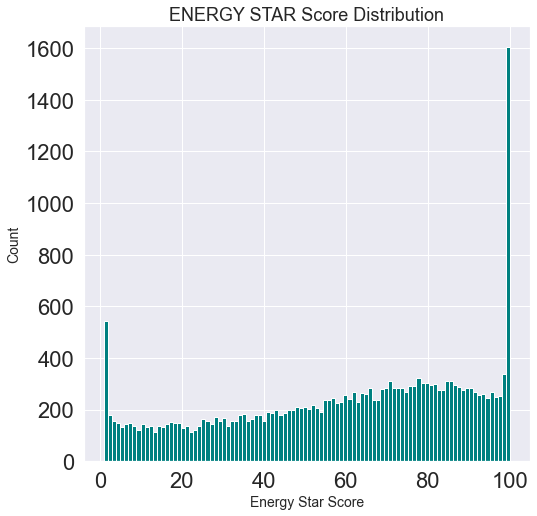

In [19]:
# Histogram of ENERGY STAR Score
figsize(8, 8)
plt.hist(df['ENERGY STAR Score'].dropna(), bins = 100, color = 'teal');
plt.xlabel('Energy Star Score', size = 14); 
plt.ylabel('Count', size = 14); 
plt.title('ENERGY STAR Score Distribution', size = 18);
plt.savefig('fig01_ENERGY_STAR_Score_Distribution');

This is interesting. There are two nodes in the data, one at 1 and another at 100. This seems like something to follow up on. Is there some shared characteristic among buildings that have a 1 or 100? The ENERGY STAR Score is a percentile score, so it seems unreasonable that so many buildings are clustered at the two extremes.

Given that above distribution, either the dataset has a high portion of extraordinarily efficient buildings, or the measure is not objective. Let's take a look at another value often used for characterizing the efficiency of a building, the Energy Use Intensity which attempts to normalize the energy usage of a building by the size of a building.

In contrast to the Energy Star Score, the Energy Use Intensity (EUI) is based on actual energy use as determined by the utility. It is straightforward to calculate: take the total annual energy use (in kBtu) and divide by the square footage of the building. The EUI is meant for normalized energy use comparisons between buildings of the same building type. This measure is likely more objective because it uses actual measure consumption. In the graph below we can see that the distribution of Energy Use Intensity is normal, which is what we would expect from a random variable.

Here are the definitions of **Site Energy Use (kBtu)** and **Site EUI (kBtu/ft^2)**
> *Site Energy Use (kBtu): The annual amount of all the energy your property consumes on-site, regardless of the source. It includes energy purchased from the grid or in bulk (which are the amounts on utility bills), as well as renewable energy generated and consumed on-site such as from solar and wind (excess renewable energy generated on-site and sold to the utility is excluded from site energy use). Site Energy can be used to understand how the energy use for an individual property has changed over time.*

> *Site EUI (kBtu/ft^2): The Site Energy Use divided by the property square foot.*


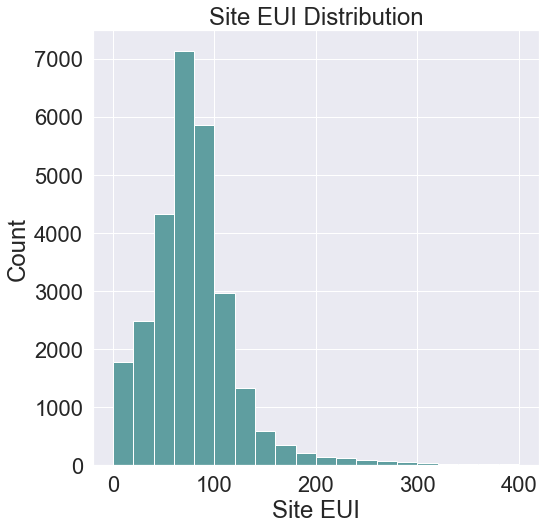

In [20]:
# Histogram of Site EUI
plt.hist(df['Site EUI (kBtu/ft??)'].dropna(), range = (0, 400), bins = 20, color = 'cadetblue');
plt.xlabel('Site EUI'); plt.ylabel('Count'); plt.title('Site EUI Distribution');

This plot is more normally distributed with no obvious skew. The Site EUI is probably a better measure of individual building energy performance than the Energy Star Score.

#### Deep Dive into Target Variable
**What do Buildings with 1 or 100 Energy Star Score have in common?**

Let's look at the suspect buildings, those with Energy Star Scores of either 1 or 100. We can try to figure out if these buildings have anything in common.

In [21]:
one_hundred = df[(df['ENERGY STAR Score'] == 1.0) | (df['ENERGY STAR Score'] == 100.0)]

one_hundred.head()

,Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postal Code,...,Number of Active IT Meters,Generation Date,Submission Date,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,Borough
1,2665352,Stellar - 70 West 93rd Street,20599688,Stellar - Campus West 93rd Street,2021-12-31,1-01206-0001,1031627,70 West 93rd Street,New York,10025,...,0,2022-09-26,2022-09-26,40.790503,-73.967920,107.0,6.0,177.0,Upper West Side,MANHATTAN
37,2677047,Stellar - 50 West 93rd Street,20599688,Stellar - Campus West 93rd Street,2021-12-31,1-01206-0045,1031639,50 West 93rd Street,New York,10025,...,0,2022-09-26,2022-09-26,40.790327,-73.967509,107.0,6.0,177.0,Upper West Side,MANHATTAN
40,4037640,Stellar - 4191 broadway,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2021-12-31,1-02176-0070,1064271,4191 broadway,New York,10033,...,0,2022-09-26,2022-09-26,40.848053,-73.937835,112.0,10.0,265.0,Washington Heights South,MANHATTAN
44,4411653,Stellar - 600 West 136th??Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2021-12-31,1-02002-0034,1059959,600 West 136th??Street,New York,10031,...,0,2022-09-26,2022-09-26,40.820935,-73.954996,109.0,7.0,22301.0,Manhattanville,MANHATTAN
47,6690535,Stellar - 2-4 West 111th Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2021-12-31,1-01594-0040,1051399,2-4 West 111th Street,New York,10026,...,0,2022-09-26,2022-09-26,40.797674,-73.949262,110.0,9.0,186.0,Central Harlem South,MANHATTAN


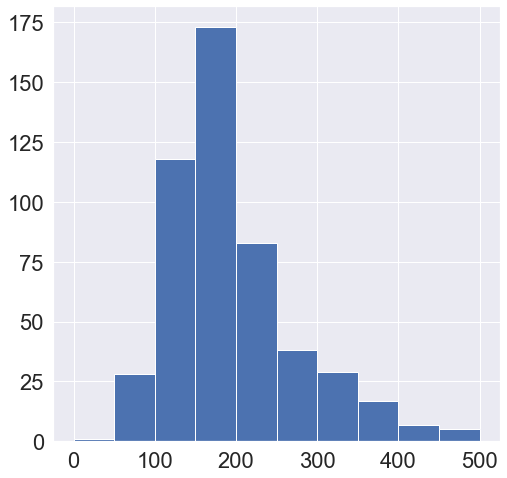

In [22]:
# Histogram of Energy Star Score = 1
plt.hist(one_hundred[one_hundred['ENERGY STAR Score'] == 1.0]['Site EUI (kBtu/ft??)'].dropna(), range = (0, 500));

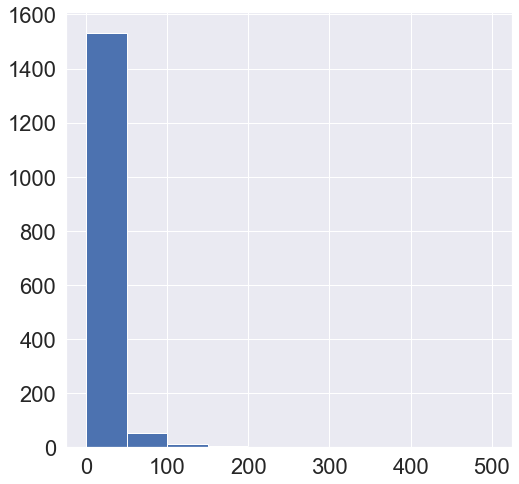

In [23]:
# Histogram of Energy Star Score = 100
plt.hist(one_hundred[one_hundred['ENERGY STAR Score'] == 100.0]['Site EUI (kBtu/ft??)'].dropna(), range = (0, 500));

It does look like buildings with Energy Star Scores of 100 have lower Site EUI than buildings with Energy Star Scores of 1.

### Site EUI (kBtu/ft^2)

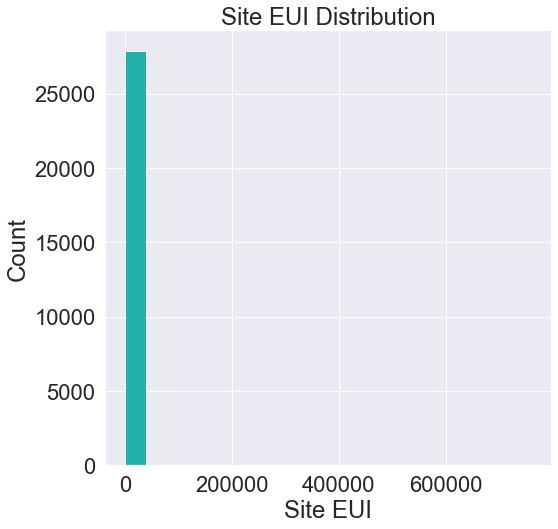

In [24]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(df['Site EUI (kBtu/ft??)'].dropna(), bins = 20, color = 'lightseagreen');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

In [25]:
# Statistics of Site EUI
df['Site EUI (kBtu/ft??)'].describe()

count     27861.000000
mean        138.011382
std        4822.140970
min           0.000000
25%          53.900000
50%          75.200000
75%          96.900000
max      760095.900000
Name: Site EUI (kBtu/ft??), dtype: float64

In [26]:
# Botton 10 rows of Site EUI
df['Site EUI (kBtu/ft??)'].dropna().sort_values().tail(10)

18045     13715.3
10699     14024.4
13424     53325.7
10315     59025.8
11105     62047.9
25495     97320.2
10907    103904.1
17907    122868.4
12064    154096.4
17900    760095.9
Name: Site EUI (kBtu/ft??), dtype: float64

In [27]:
# Locate Outlier
df.loc[df['Site EUI (kBtu/ft??)'] == 760095.9, :]

,Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postal Code,...,Number of Active IT Meters,Generation Date,Submission Date,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,Borough
17900,6720128,St. Barnabas Nursing Home 1,19491105,St. Barnabas Parent,2021-12-31,2030640001,2094217,4422 3rd Avenue,Bronx,10457,...,0,2022-05-27,2022-05-27,40.853346,-73.891611,206.0,15.0,37504.0,East Tremont,BRONX


It might be worthwhile for someone to follow up with this building owner! However, that is not our problem and we only need to figure out how to handle this information. Outliers can occur for many reasons: typos, malfunctions in measuring devices, incorrect units, or they can be legitimate but extreme values. Outliers can throw off a model because they are not indicative of the actual distribution of data.

#### Removing Outliers

When we remove outliers, we want to be careful that we are not throwing away measurements just because they look strange. They may be the result of actual phenomenon that we should further investigate. When removing outliers, I try to be as conservative as possible, using the definition of an extreme outlier:

Extreme outliers are any data values which lie more than 3.0 times the interquartile range below the first quartile or above the third quartile.

For this project, we will only remove the single outlying point and see how the distribution looks.

In [28]:
# Calculate first and third quartile
first_q = df['Site EUI (kBtu/ft??)'].describe()['25%']
third_q = df['Site EUI (kBtu/ft??)'].describe()['75%']

# Interquartile range
iqr = third_q - first_q

# Remove outliers
df = df[(df['Site EUI (kBtu/ft??)'] > (first_q - 3 * iqr)) &
        (df['Site EUI (kBtu/ft??)'] < (third_q + 3 * iqr))]

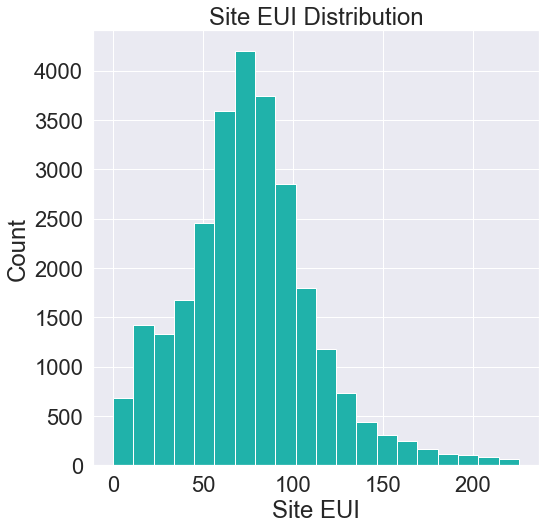

In [29]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(df['Site EUI (kBtu/ft??)'].dropna(), bins = 20, color = 'lightseagreen');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

This plot looks like it's close to normally distributed with a long tail on the right side meaning it has a positive skew.

Although this might be a more objective measure, our goal is still to predict the Energy Star Score, so we will move back to examining that variable. Even if the score is not a good measure, it is still our task to predict it. In the final report I will point out this might not be an objective measure, and it would be a good idea to use different metrics to determine the efficiency of a building.

### Property Type
Let's take a look at the distribution of Property Types. We will just take the top 10 most common property types.

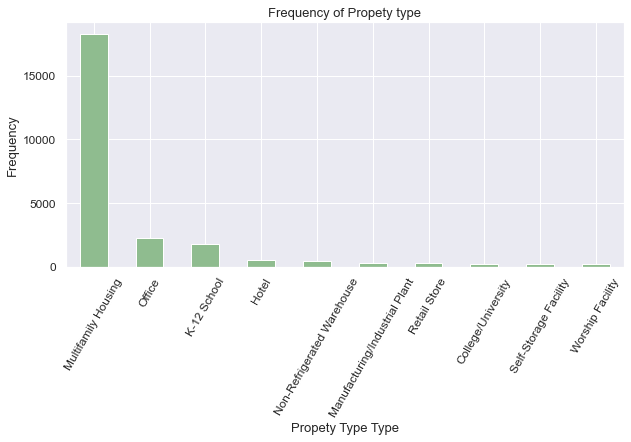

In [30]:
# Plot Frequency of Property Type
df['Primary Property Type - Self Selected'].value_counts()\
                          .head(10)\
                          .plot(kind     = 'bar',
                                color = 'darkseagreen',
                                figsize  = (10,4.5),
                                fontsize = 12,
                                rot      = 60)
        
plt.title('Frequency of Propety type', fontsize=13)
plt.xlabel('Propety Type Type', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.savefig('fig02_Property_Type_Frequency');

The most common property types in NYC are Multifamily Housing, then Offices. 

Let's look at the Energy Star ratings of properties across different property types, but first how many different property types are there?

In [31]:
# Display unique count of differnt property types
print("Number of property types are: {}".format(len(df['Primary Property Type - Self Selected'].unique())))

Number of property types are: 74


This is too many property types to visualize the Energy Star Score of each, we'll just look at just 5 building types, lumping the 74 into the categories into either:
* Residential
* Office
* Retail
* Storage
* Other

I built a function to group the properties into the 5 types and we use it below to transform the Panda Series.

In [32]:
# Function to group propety types into 5 categories
def group_property_types(row : str) -> str:
    if row == 'Multifamily Housing' or\
    row == 'Residence Hall/Dormitory' or\
    row == 'Hotel' or\
    row == 'Other - Lodging/Residential' or\
    row == 'Residential Care Facility':
        return 'Residential'
    elif row == 'Non-Refrigerated Warehouse' or\
    row == 'Self-Storage Facility' or\
    row == 'Refrigerated Warehouse':
        return 'Storage'
    elif row == 'Financial Office' or\
    row == 'Office':
        return 'Office'
    elif row == 'Restaurant' or\
    row == 'Retail Store' or\
    row == 'Enclosed Mall' or\
    row == 'Other - Mall' or\
    row == 'Strip Mall' or\
    row == 'Personal Services (Health/Beauty, Dry Cleaning, etc.)' or\
    row == 'Lifestyle Center' or\
    row == 'Wholesale Club/Supercenter':
        return 'Retail'
    else:
        return 'Other'

In [33]:
Property_Type = df.copy()
Property_Type['Primary Property Type - Self Selected'] = Property_Type['Primary Property Type - Self Selected'].apply(group_property_types)

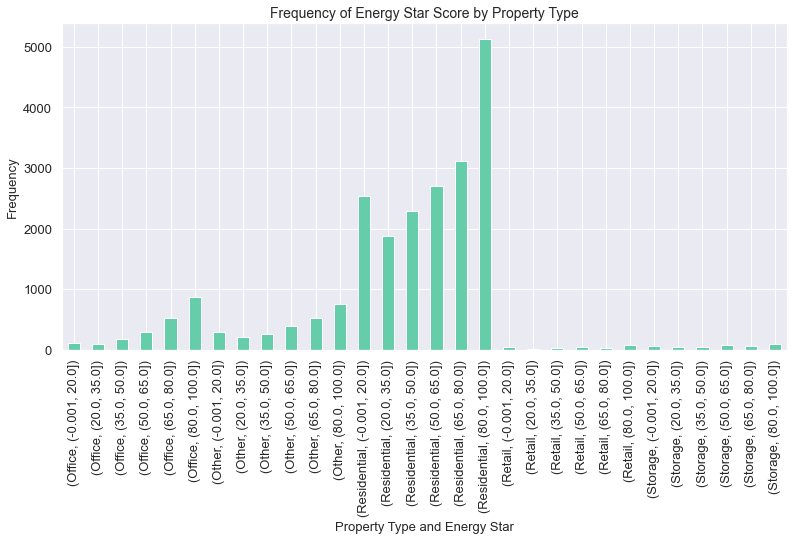

In [34]:
bins2 = [0,20,35,50,65,80,100]

Energy_Star_Scores = Property_Type.groupby(['Primary Property Type - Self Selected'])['ENERGY STAR Score']

Energy_Star_Scores.value_counts(bins=bins2)\
                  .sort_index()\
                  .plot(kind='bar',
                        color = 'mediumaquamarine',
                        figsize=(13,6),
                        fontsize=13)

plt.title('Frequency of Energy Star Score by Property Type',fontsize=14)
plt.xlabel('Property Type and Energy Star', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.savefig('fig03_Property_Category_Frequency');

Overall it looks like residential buildings have a lot more proportion of low Energy Star Scoring buildings when compared to office buildings. This is probably because there are much more older residential buildings than office spaces in New York City.

In [35]:
# Apply formula to dataframe
df['Primary Property Type - Self Selected'] = df['Primary Property Type - Self Selected'].apply(group_property_types)

In [36]:
# Disply property category value counts
df['Primary Property Type - Self Selected'].value_counts()

Residential    19254
Other           4542
Office          2295
Storage          687
Retail           414
Name: Primary Property Type - Self Selected, dtype: int64

### Boroughs
Let's take a look a the distribution of the Boroughs

Text(0, 0.5, 'Frequency')

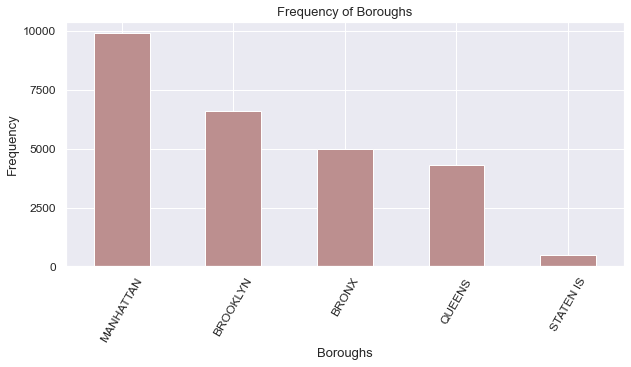

In [37]:
# Visualize Frequency of Boroughs in NY
df['Borough'].value_counts()\
                          .plot(kind     = 'bar',
                                color = 'rosybrown',
                                figsize  = (10,4.5),
                                fontsize = 12,
                                rot      = 60)
        
plt.title('Frequency of Boroughs', fontsize=13)
plt.xlabel('Boroughs', fontsize=13)
plt.ylabel('Frequency', fontsize=13)

Manhattan and Brooklyn dominate in frequency followed by Bronx, Queens, and Staten Island

## Feature Relationships
***
In order to determine if certain property types tend to score better or worse on the Energy Star Score, we can plot the distribution of energy star scores by property type. Following is a density plot showing the distribution of scores for property types with more than 100 measurements in the data.

The kernel density plot x-limits do extend beyond the range of actual scores because of the kernel density estimation method used to make the probability density distribution. The actual values in a density plot can be difficult to interpret, and it is more instructive to focus on the distribution/shape of the figure.

### Energy Star Score by Property Type

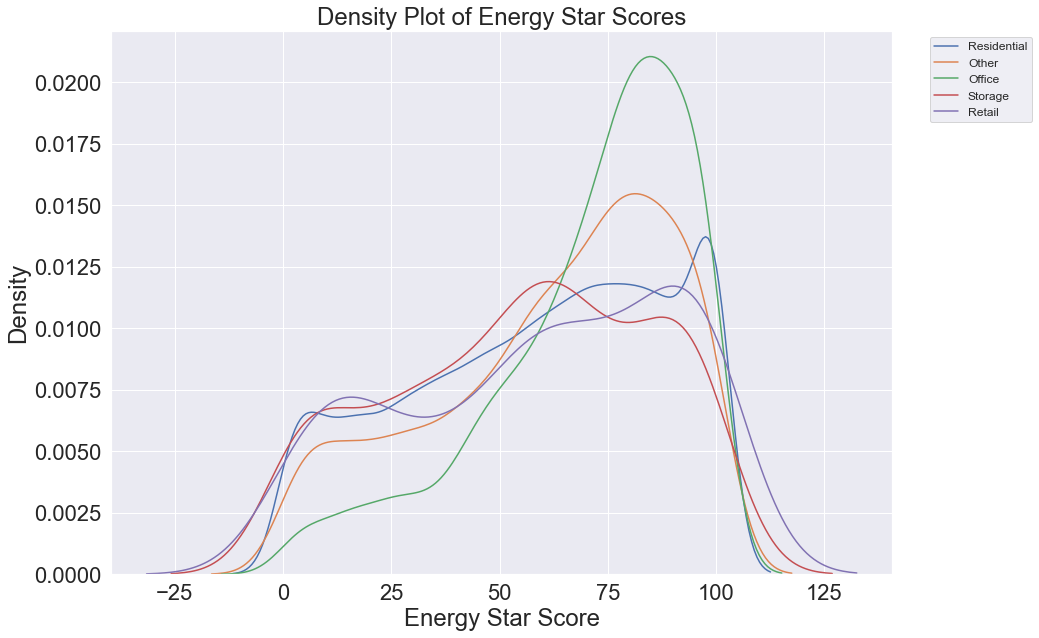

In [38]:
# Create a list of buildings with more than 100 measurements
ptypes = df.dropna(subset=['ENERGY STAR Score'])
ptypes = ptypes['Primary Property Type - Self Selected'].value_counts()
ptypes = list(ptypes[ptypes.values > 100].index)

figsize(14, 10)

# Plot each building
for p_type in ptypes:
    # Select the building type
    subset = df[df['Primary Property Type - Self Selected'] == p_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['ENERGY STAR Score'].dropna(),
               label = p_type);
    
plt.xlabel('Energy Star Score');
plt.ylabel('Density'); 
plt.legend(bbox_to_anchor=(1.04,1), loc='upper left', fontsize = 12);
plt.title('Density Plot of Energy Star Scores');
plt.savefig('fig04_Energy_Star_Property_Density_Plot');

From this graph, we can see that the property type does have an effect on the score. While I was initially going to focus on the numerical columns for predicting the score, this graph tells us that we should include the property type because this information can be useful for determining the score. As property type is a categorical variable, it will have to be one-hot encoded before we can feed it into a machine learning model.

To examine another categorical variable, borough, we can make the same graph, but this time colored by the borough.

### Energy Star Score by Borough

In [39]:
# Create a list of boroughs with more than 100 observations
boroughs = df.dropna(subset=['ENERGY STAR Score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

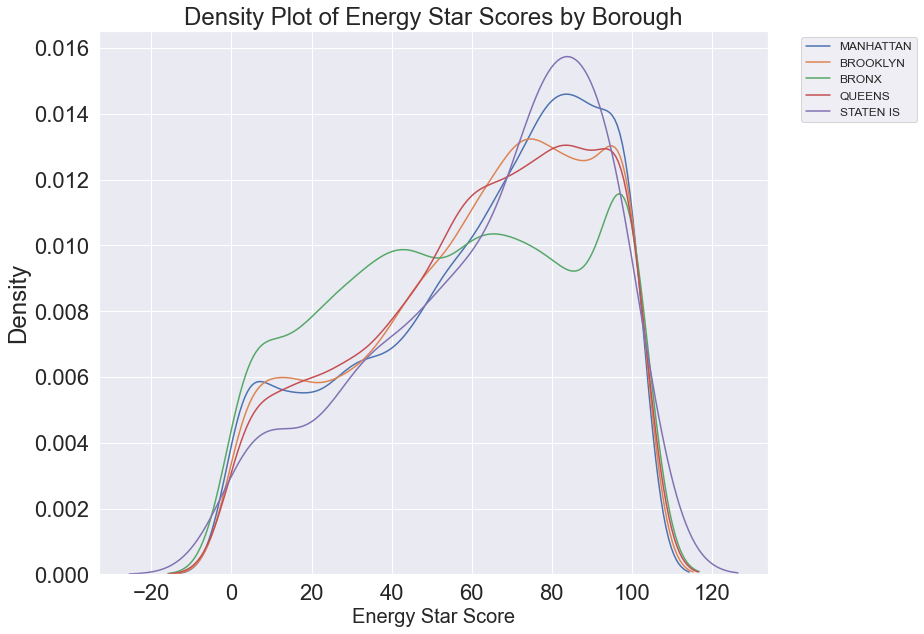

In [40]:
# Plot of distribution of scores for boroughs
figsize(12, 10)

# Plot each borough distribution of scores
for borough in boroughs:
    # Select the building type
    subset = df[df['Borough'] == borough]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['ENERGY STAR Score'].dropna(),
               label = borough);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density');
plt.legend(bbox_to_anchor=(1.04,1), loc='upper left', fontsize = 12);
plt.title('Density Plot of Energy Star Scores by Borough');

The borough of the building does not seem to make as significant a difference in the distribution of the score as does the building type. Nonetheless, it might make sense to include the borough as a categorical variable.

### Site EUI by Property Type

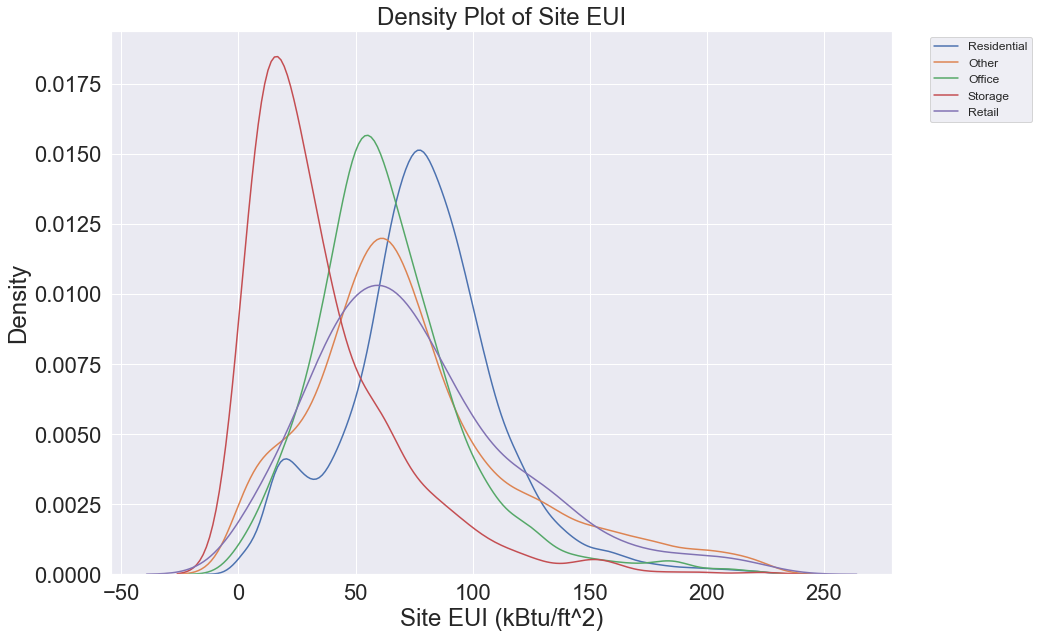

In [41]:
figsize(14, 10)

# Plot the site EUI density plot for each building type
for p_type in ptypes:
    # Remove outliers before plotting
    subset = df[(df['Site EUI (kBtu/ft??)'] < 300) & 
                     (df['Primary Property Type - Self Selected'] == p_type)]
    
    # Plot the site EUI on a density plot
    sns.kdeplot(subset['Site EUI (kBtu/ft??)'].dropna(), 
                label = p_type);
    
plt.xlabel('Site EUI (kBtu/ft^2)'); plt.ylabel('Density');
plt.legend(bbox_to_anchor=(1.04,1), loc='upper left', fontsize = 12);
plt.title('Density Plot of Site EUI');

This plot provides us with another conclusion: there appears to be a negative correlation between the Site EUI and the Energy Star Score based on comparing the two distributions between building types. Building types with lower Site EUI's tend to have higher Energy Star Scores. The higher the energy use intensity, the worse the building's energy efficiency performance.

## Correlations with Target Variable
***
Let's take a look at the Pearson Correlation Coefficient between all the numerical columns and the Energy Star Score. This measures the linear relationship between two variables, and it might explain on what features are related to the Energy Star Score. This is a measure of the strength and direction of a linear relationship between two variables: a value of -1 means the two variables are perfectly negatively linearly correlated and a value of +1 means the two variables are perfectly positively linearly correlated.

Although there can be non-linear relationships between the features and targets and correlation coefficients do not account for interactions between features, linear relationships are a good way to start exploring trends in the data. We can then use these values for selecting the features to employ in our model.

The code below calculates the correlation coefficients between all the variables and the score.

In [42]:
# Display Correlations and sort
cor_df = df.corr()['ENERGY STAR Score'].sort_values()

In [43]:
# Display the most negative correlations
print(cor_df.head(10), '\n')

Site EUI (kBtu/ft??)                                          -0.756100
Weather Normalized Site EUI (kBtu/ft??)                       -0.746124
Total GHG Emissions Intensity (kgCO2e/ft??)                   -0.731713
Weather Normalized Source EUI (kBtu/ft??)                     -0.723423
Source EUI (kBtu/ft??)                                        -0.717553
Direct GHG Emissions Intensity (kgCO2e/ft??)                  -0.541389
Weather Normalized Site Natural Gas Intensity (therms/ft??)   -0.475823
Weather Normalized Site Electricity Intensity (kWh/ft??)      -0.341356
Indirect GHG Emissions Intensity (kgCO2e/ft??)                -0.318376
Occupancy                                                     -0.082585
Name: ENERGY STAR Score, dtype: float64 



In [44]:
# Display the most positive correlations
print(cor_df.tail(10),)

Property GFA - Calculated (Buildings) (ft??)                                                                        0.031655
Property GFA - Self-Reported (ft??)                                                                                 0.031659
Largest Property Use Type - Gross Floor Area (ft??)                                                                 0.034088
National Median Total GHG Emissions (Metric Tons CO2e)                                                              0.044010
Multifamily Housing - Number of Bedrooms Density (Number per 1,000 sq ft)                                           0.046601
Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building (5-9 Stories)                       0.049792
Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building Density (Number per 1,000 sq ft)    0.084615
National Median Source EUI (kBtu/ft??)                                                                              0.127541


<AxesSubplot:>

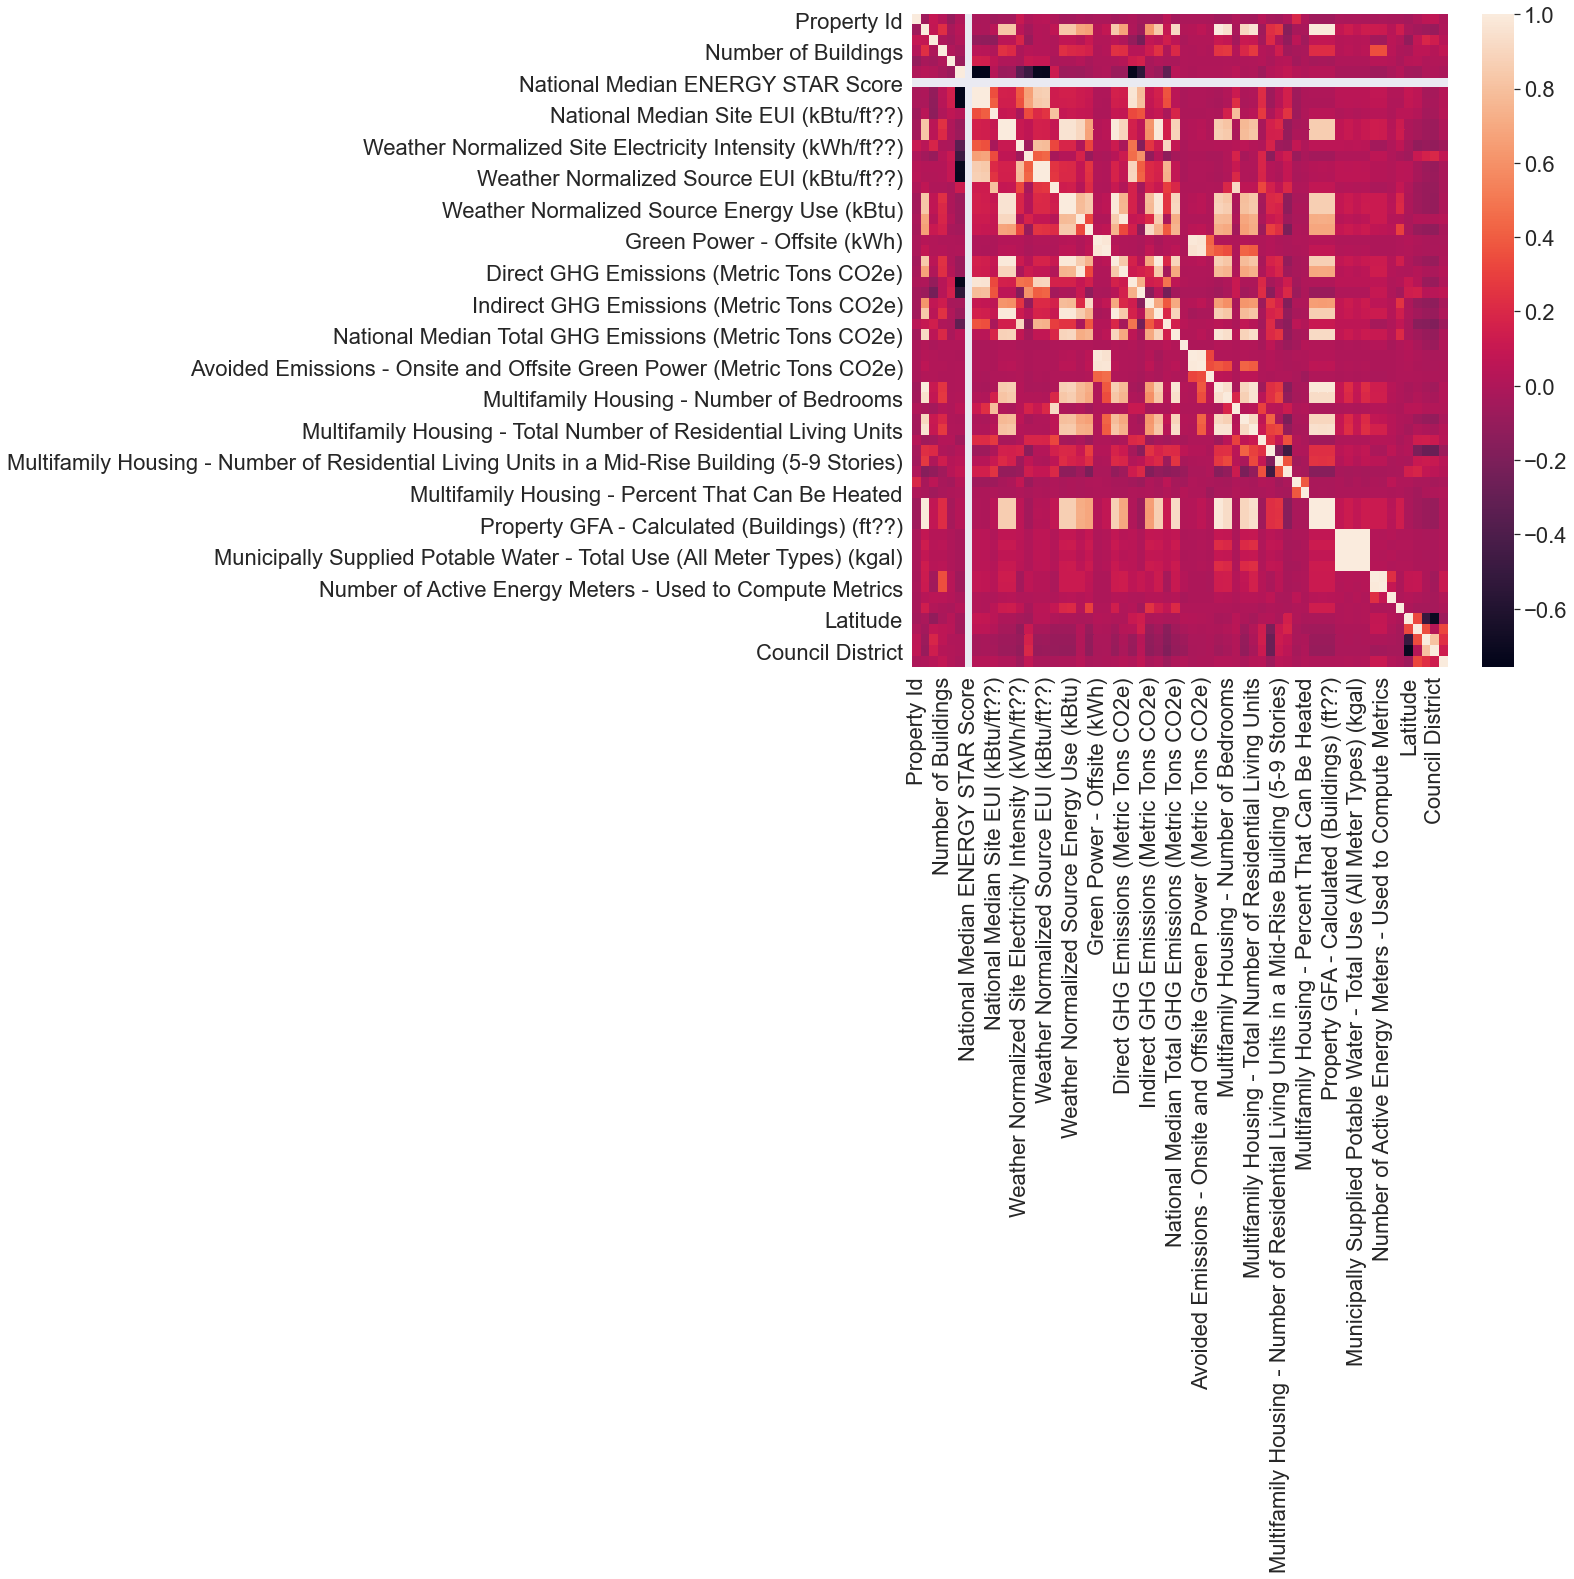

In [45]:
#Correlation data
corr_matrix = df.corr()

#Heatmap of correlations
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix,data = df)

There are several strong negative correlations between the features and the target. The most negative correlations with the score are the different categories of Energy Use Intensity, Site EUI (kBtu/ft^2) and Weather Normalized Site EUI (kBtu/ft^2). The EUI is the amount of energy used by a building divided by the square footage of the buildings and is meant to be a measure of the efficiency of a building with a lower score being better. Intuitively, these correlations then make sense: as the EUI increases, the Energy Star Score decrease.

### Correlations with Site EUI & Total GHG Emissions
Lets review the feature correlations with Site EUI & Total GHG Emissions

In [46]:
site_corr = df.corr()['Site EUI (kBtu/ft??)'].sort_values()

In [47]:
site_corr.tail(10)

Indirect GHG Emissions Intensity (kgCO2e/ft??)                 0.374471
Weather Normalized Site Electricity Intensity (kWh/ft??)       0.383733
Weather Normalized Site Natural Gas Intensity (therms/ft??)    0.663267
Direct GHG Emissions Intensity (kgCO2e/ft??)                   0.784177
Source EUI (kBtu/ft??)                                         0.861562
Weather Normalized Source EUI (kBtu/ft??)                      0.875485
Total GHG Emissions Intensity (kgCO2e/ft??)                    0.967186
Weather Normalized Site EUI (kBtu/ft??)                        0.996855
Site EUI (kBtu/ft??)                                           1.000000
National Median ENERGY STAR Score                                   NaN
Name: Site EUI (kBtu/ft??), dtype: float64

In [48]:
ghg_corr = df.corr()['Total GHG Emissions Intensity (kgCO2e/ft??)'].sort_values()

In [49]:
ghg_corr.tail(10)

Weather Normalized Site Natural Gas Intensity (therms/ft??)    0.458557
Weather Normalized Site Electricity Intensity (kWh/ft??)       0.482301
Indirect GHG Emissions Intensity (kgCO2e/ft??)                 0.488131
Direct GHG Emissions Intensity (kgCO2e/ft??)                   0.732008
Source EUI (kBtu/ft??)                                         0.892700
Weather Normalized Source EUI (kBtu/ft??)                      0.903563
Weather Normalized Site EUI (kBtu/ft??)                        0.959963
Site EUI (kBtu/ft??)                                           0.967186
Total GHG Emissions Intensity (kgCO2e/ft??)                    1.000000
National Median ENERGY STAR Score                                   NaN
Name: Total GHG Emissions Intensity (kgCO2e/ft??), dtype: float64

Site EUI and Total GHG Emissions Intensity are correlated and Natural Gas Intensity is highly correlated to Site EUI. Meaning using less natural gas will result to lower energy usage.

### Cateogorical vs. Continuous Features
To account for possible non-linear relationships, we can take square root and natural log transformations of the features and then calculate the correlation coefficients with the score. To try and capture any possible relationships between the borough or property type and the score we will have to one-hot encode these columns.

In the following code, we take log and square root transformations of the numerical variables, one-hot encode the two selected categorical variables, calculate the correlations between all of the features and the score, and display the top 10 most positive and top 10 most negative correlations

In [50]:
# Select continous columns
numeric_subset = df.select_dtypes('number')

# Tramsform columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'ENERGY STAR Score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = df[['Borough', 'Primary Property Type - Self Selected']]

# One hot encode for catergorical columns
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat & use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['ENERGY STAR Score'])

# Find correlations with the score 
correlations = features.corr()['ENERGY STAR Score'].dropna().sort_values()

C:\Users\ZAPTOS\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ZAPTOS\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ZAPTOS\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [51]:
# Display most negative correlations
correlations.head(10)

Site EUI (kBtu/ft??)                               -0.756100
Weather Normalized Site EUI (kBtu/ft??)            -0.746124
sqrt_Weather Normalized Source EUI (kBtu/ft??)     -0.740619
sqrt_Site EUI (kBtu/ft??)                          -0.739787
sqrt_Source EUI (kBtu/ft??)                        -0.736955
Total GHG Emissions Intensity (kgCO2e/ft??)        -0.731713
sqrt_Weather Normalized Site EUI (kBtu/ft??)       -0.729812
sqrt_Total GHG Emissions Intensity (kgCO2e/ft??)   -0.727372
Weather Normalized Source EUI (kBtu/ft??)          -0.723423
Source EUI (kBtu/ft??)                             -0.717553
Name: ENERGY STAR Score, dtype: float64

In [52]:
# Display most positive correlations
correlations.tail(10)

log_Property GFA - Self-Reported (ft??)                                                               0.110077
sqrt_Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building (5-9 Stories)    0.110438
log_Multifamily Housing - Number of Bedrooms                                                          0.111828
log_Largest Property Use Type - Gross Floor Area (ft??)                                               0.112430
Primary Property Type - Self Selected_Office                                                          0.117539
log_National Median Total GHG Emissions (Metric Tons CO2e)                                            0.118107
National Median Source EUI (kBtu/ft??)                                                                0.127541
sqrt_National Median Source EUI (kBtu/ft??)                                                           0.178440
log_National Median Source EUI (kBtu/ft??)                                                            0.184831
E

After transforming the features, the strongest relationships are still those related to Energy Use Intensity (EUI). The log and square root transformations do not seem the have resulted in any stronger relationships.

We can use these correlations in order to perform feature selection. Right now, let's graph the most significant correlation (in terms of absolute value) in the dataset which is Site EUI (kBtu/ft^2). We can color the graph by the building type to show how that affects the relationship.

**Two Variable Plot - Energy Star Score versus Site EUI**

In order to visualize the relationship between two variables, we use a scatterplot. We can also include additional variables using aspects such as color of the markers or size of the markers. Here we will plot two numeric variables against one another and use color to represent a third categorical variable.

C:\Users\ZAPTOS\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ZAPTOS\anaconda3\envs\learn-env\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


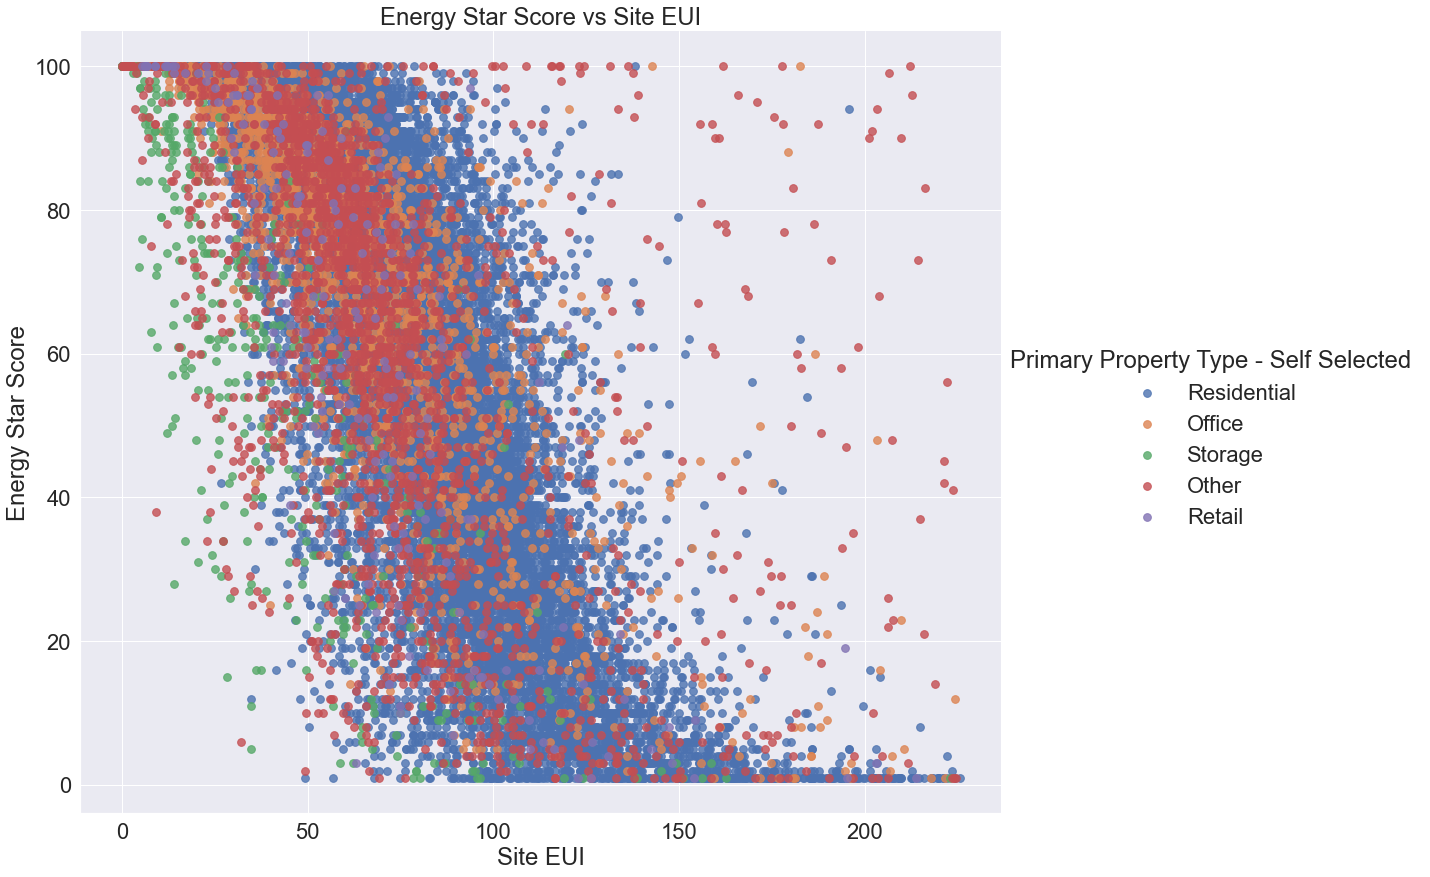

In [53]:
figsize(12, 10)

# Extract the building types
features['Primary Property Type - Self Selected'] = df.dropna(subset = ['ENERGY STAR Score'])['Primary Property Type - Self Selected']

# Limit to building types with more than 100 observations (from previous code)
features = features[features['Primary Property Type - Self Selected'].isin(ptypes)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('Site EUI (kBtu/ft??)', 'ENERGY STAR Score', 
          hue = 'Primary Property Type - Self Selected', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("Site EUI")
plt.ylabel('Energy Star Score')
plt.title('Energy Star Score vs Site EUI');
plt.savefig('fig05_Two_Variable_Plot');

The plot shows the expected negative relationship between Energy Star Score and Site EUI. This relationship looks like it holds across property types. To quantify the relationship, we can calculate the Pearson Correlation Coefficient between the two variables. This is a measure of linear correlation which shows both the strength and the direction of the relationship. We will look at the correlation coefficient between Energy Star Scores and several measures.

### Linear Correlations with Energy Star Score

In [54]:
# List of Variables to find correlation coefficients
features_1 = ['Primary Property Type - Self Selected',
            'Weather Normalized Site EUI (kBtu/ft??)',
            'Weather Normalized Site Electricity Intensity (kWh/ft??)',
             'Largest Property Use Type - Gross Floor Area (ft??)',
            'ENERGY STAR Score']

subset_1 = df[features_1].dropna()
subset_1 = subset_1[subset_1['Primary Property Type - Self Selected'].isin(ptypes)]

# Rename the columns
subset_1.columns = ['Property Type', 'Site EUI', 
                  'Electricity Intensity', 'Floor Area','Energy Star Score']

# Remove outliers
subset_1 = subset_1[subset_1['Site EUI'] < 300]

In [55]:
# Group by the building type and calculate correlations
corrs = pd.DataFrame(subset_1.groupby('Property Type').corr())
corrs = pd.DataFrame(corrs['Energy Star Score'])

# Format the dataframe for display
corrs = corrs.reset_index()
corrs.columns = ['Property Type', 'Variable', 'Correlation with Score']
corrs = corrs[corrs['Variable'] != 'Energy Star Score']
corrs

,Property Type,Variable,Correlation with Score
0,Office,Site EUI,-0.771801
1,Office,Electricity Intensity,-0.724265
2,Office,Floor Area,0.036981
4,Other,Site EUI,-0.552736
5,Other,Electricity Intensity,-0.422932
6,Other,Floor Area,0.095274
8,Residential,Site EUI,-0.783383
9,Residential,Electricity Intensity,-0.396879
10,Residential,Floor Area,0.007027
12,Retail,Site EUI,-0.777072


This shows the correlation between Energy Star Score and 3 different measures by building type. For all buildings we see the following relationships: Energy Star Score is strongly negatively correlated with the Electricity Intensity and the Site EUI. The relationship between floor area and the Energy Star score is weak for all building types.

**Pairs Plot**

As a final exercise for exploratory data analysis, we can make a pairs plot between several different variables. The Pairs Plot is a great way to examine many variables at once as it shows scatterplots between pairs of variables and histograms of single variables on the diagonal.

Using the seaborn PairGrid function, we can map different plots on to the three aspects of the grid. The upper triangle will have scatterplots, the diagonal will show histograms, and the lower triangle will show both the correlation coefficient between two variables and a 2-D kernel density estimate of the two variables.

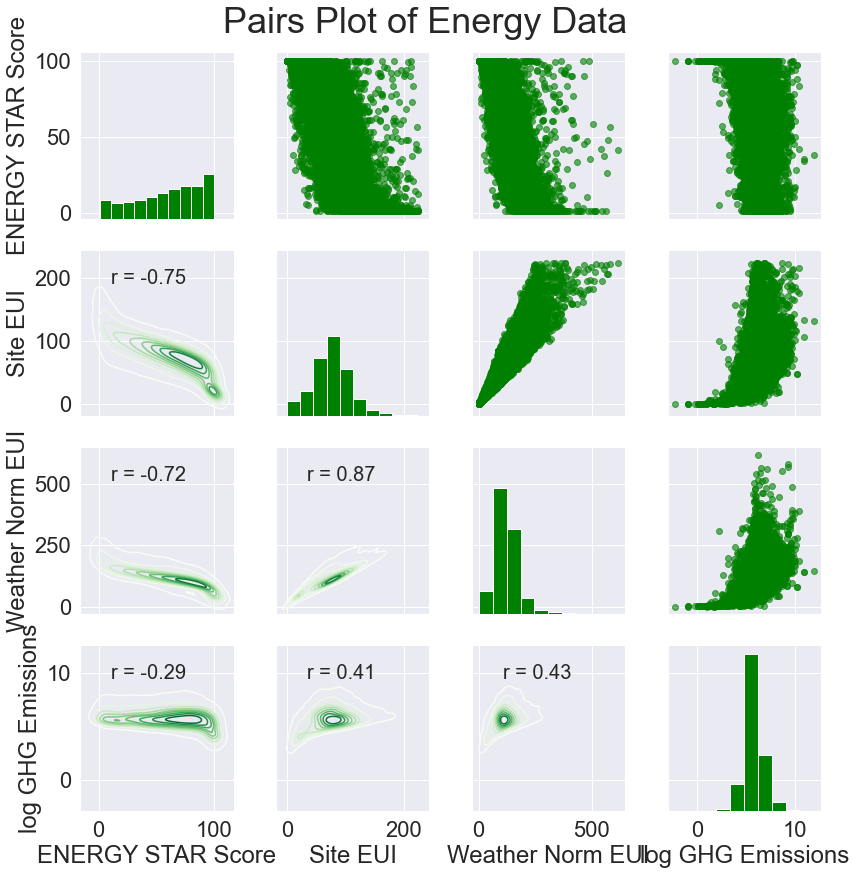

In [56]:
# Extract the columns to  plot
plot_df = features[['ENERGY STAR Score', 'Site EUI (kBtu/ft??)', 
                      'Weather Normalized Source EUI (kBtu/ft??)', 
                      'log_Total GHG Emissions (Metric Tons CO2e)']]

# Replace the inf with nan
plot_df = plot_df.replace({np.inf: np.nan, -np.inf: np.nan})

# Rename columns 
plot_df = plot_df.rename(columns = {'Site EUI (kBtu/ft??)': 'Site EUI', 
                                        'Weather Normalized Source EUI (kBtu/ft??)': 'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

# Drop na values
plot_df = plot_df.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
pair = sns.PairGrid(data = plot_df, height = 3)

# Upper is a scatter plot
pair.map_upper(plt.scatter, color = 'green', alpha = 0.6)

# Diagonal is a histogram
pair.map_diag(plt.hist, color = 'green')

# Bottom is correlation and density plot
pair.map_lower(corr_func);
pair.map_lower(sns.kdeplot, cmap = plt.cm.Greens)

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);

To interpret the relationships in the plot, we can look for where the variables in one row intersect with the variables in one column. For example, to find the relationship between score and the log of GHG Emissions, we look at the score column and find the log GHG Emissions row. At the intersection (the lower left plot) we see that the score has a -0.29 correlation coefficient with this varible. If we look at the upper right plot, we can see a scatterplot of this relationship.

## Feature Engineering and Selection
***
Now that we have explored the trends and relationships within the data, we can work on engineering a set of features for our models. We can use the results of the EDA to inform this feature engineering. In particular, we learned the following from EDA which can help us in engineering/selecting features:
* The score distribution varies by property type and to a lesser extent by borough. Although we will focus on numerical features, we should also include these two categorical features in the model.
* Taking the log transformation of features does not result in significant increases in the linear correlations between features and the score

In this project, we will take the following steps for feature engineering:

Select only the numerical variables and two categorical variables (borough and property use type)
* Add in the log transformation of the numerical variables
* One-hot encode the categorical variables

For feature selection, we will do the following:
* Remove collinear features

We will address multicollinearity in the next process

**Continuous vs Categorical Feature Engineering**

In [57]:
# Copy the original data
features = df.copy()

# Select the numeric columns
numeric_subset = df.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'ENERGY STAR Score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# Select the categorical columns
categorical_subset = df[['Borough', 'Primary Property Type - Self Selected']]

# One hot encode for categorical columns
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat & use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

print('The shape of our new dataframe is:', features.shape)

C:\Users\ZAPTOS\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ZAPTOS\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


The shape of our new dataframe is: (27192, 133)


At this point, we have 27,192 observations (buildings) with 132 different features (one column is the score). Not all of these features are likely to be important for predicting the score, and several of these features are also redundant because they are highly correlated. We will deal with this second issue below.

### Multicollinearity

Before we build a machine learning model, we want to remove features that are highly collinear with one another (not with the Energy Star Score). The objective is to determine if there are independent variables that are predictive of the Energy Star Score, so we do not want to use multiple collinear variables in our model. For example, Site EUI and Weather Normalized Site EUI are very highly correlated and therefore we only need to include one of these measures in our model.

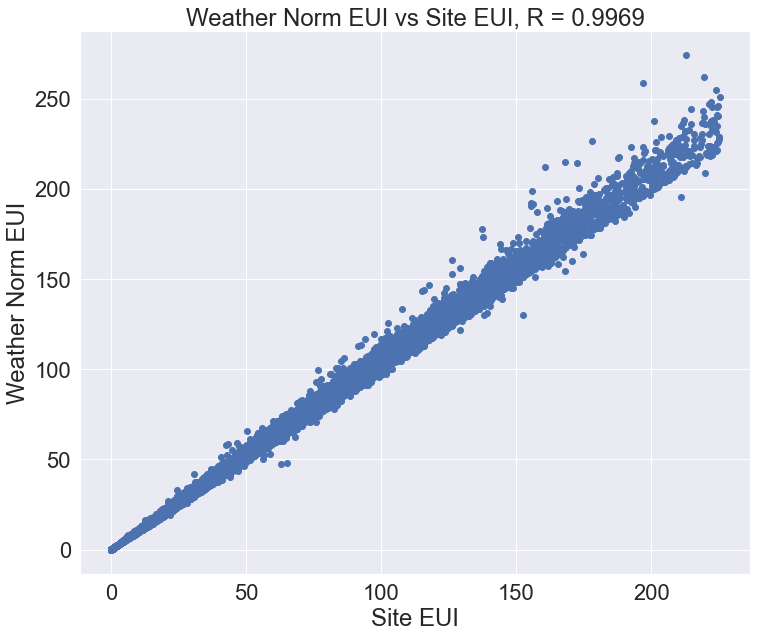

In [58]:
plot_data = df[['Weather Normalized Site EUI (kBtu/ft??)', 'Site EUI (kBtu/ft??)']].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft??)'], plot_data['Weather Normalized Site EUI (kBtu/ft??)'], 'bo')
plt.xlabel('Site EUI'); 
plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(df[['Weather Normalized Site EUI (kBtu/ft??)', 
                                                                      'Site EUI (kBtu/ft??)']].dropna(), rowvar=False)[0][1]);

While variables in a dataset are usually correlated to a small degree, highly collinear variables can be redundant in the sense that we only need to retain one of the features to give our model the necessary information.

Removing collinear features is a method to reduce model complexity by decreasing the number of features and can help to increase model generalization.

There are a number of methods for removing collinear features, such as using the Variance Inflation Factor. We will use a simpler metric, and remove features that have a correlation coefficient above a certain threshold with each other. 

A simple method for removing collinear features is to calculate the correlation coefficient between every pair of variables and remove those with a magnitude greater than a specified threshold. This procedure is carried out here, using a threshold of 0.6 for the magnitude of the correlation coefficient.

In [59]:
def multicollinearity(x, threshold):    
    # Dont want to remove correlations between Energy Star Score
    y = x['ENERGY STAR Score']
    x = x.drop(columns = ['ENERGY STAR Score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft??)',
                          'Largest Property Use Type - Gross Floor Area (ft??)'])
    
    # Add the score back in to the data
    x['ENERGY STAR Score'] = y
               
    return x

In [60]:
# Remove the collinear features above a specified correlation coefficient
features = multicollinearity(features, 0.6);

<ipython-input-59-2fc9571b3519>:20: RuntimeWarning: invalid value encountered in greater_equal
  if val >= threshold:


In [61]:
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
print('The shape of our dataframe is:', features.shape)

The shape of our dataframe is: (27192, 39)


Our final dataset now has 38 features (one of the columns is the target). This is still quite a few, but mostly it is because we have one-hot encoded the categorical variables. Moreover, while a large number of features may be problematic for models such as linear regression, models such as the random forest perform implicit feature selection and automatically determine which features are important during training. There are other feature selection steps to take, but for now we will keep all the features we have and see how the model performs.

## Machine Learning
***
The objective is to predict the Energy Star Score of a building given the variables available in the data. First, we will separate out the buildings that have a score and those without for later inference. Of the buildings with an Energy score, we will use 70% for training the model and 30% for evaluating our model. We will try two different methods:
1. **Regression**: Predict the numerical value of the Energy Star Score
> * Metrics: Mean Absolute Error, the average deviation between predictions and true values and R^2, th percentage of variation in the response explained by the model
2. **Classification**: Divide the buildings into 5 groupings based on Energy Star Score intervals of 20 points. Predict the class for a building.
> * Metrics: Accuracy, f1_score -the harmonic mean of precision and recall, and the confusion matrix

### Feature Preprocessing
To prepare the data for machine learning, we will use a few standard preprocessing steps:

1. Subset to numerical columns and 2 categorical columns. I primarily want to focus on using the numeric values to predict the score, but I will also include categorical columns including the building type because we saw that is related to the score.
2. One-hot encoding of categorical variables.
3. Split into training and testing sets. We will be using 70% training and 30% testing.
4. Impute the missing values. There are many methods for imputation, but I will use the straightforward median imputation. We need to train the imputer only on the training data and make transformations of both the training data and the testing data.
5. Return the values for training and testing the model.

#### Train-Test Split
In machine learning, the features should always be separated into two sets:
* Train Set: which we provide to our model during training along with the answers so it can learn a mapping between the features and the target.
* Test Set: which we use to evaluate the mapping learned by the model. The model has never seen the answers on the testing set, but instead, must make predictions using only the feature.

For our problem, we will first extract all the buildings without an Energy Star Score because we don't know the true answer for these buildings so they will not be helpful for training or testing. Then, we will split the buildings with an Energy Star Score into a testing set of 30% of the buildings, and a training set of 70% of the buildings.
Finally we can will set the random state of the split to ensure consistent results.

In [62]:
# Extract the buildings with no score and the buildings with a score
no_score = features[features['ENERGY STAR Score'].isna()]
score = features[features['ENERGY STAR Score'].notnull()]

print(no_score.shape)
print(score.shape)

(4457, 39)
(22735, 39)


We have 4,457 buildings with no score and 22,735 buildings with an Energy Star Score.

In [63]:
# Split the features and targets
features = score.drop(columns='ENERGY STAR Score')
targets = pd.DataFrame(score['ENERGY STAR Score'])

# Replace the inf and -inf with nan -required for later imputation
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(15914, 38)
(6821, 38)
(15914, 1)
(6821, 1)


We have 15,914 buildings with a score in the training set and 6,821 buildings with a score in the testing set. Our final step before our modeling is to determine a naive baseline to compare our models.

### Establish a Baseline
It's important to establish a naive baseline before we beginning making machine learning models. If the models we build cannot outperform a naive guess then we might have to admit that machine learning is not suited for this problem.

For a regression task, a good naive baseline is to predict the median value of the target on the training set for all examples on the test set. This is simple to implement and sets a relatively low bar for our models: if they cannot do better than guessing the medin value, then we will need to rethink our approach.

#### Metric: Mean Absolute Error
There are a number of metrics used in machine learning tasks and it can be difficult to know which one to choose. Most of the time it will depend on the particular problem and if you have a specific goal to optimize for. In this case, because we are performing regression, the mean absolute error is an appropriate metric. This is also interpretable because it represents the average amount our estimate is off by in the same units as the target value.

In [64]:
# Create Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [65]:
baseline_naive = np.median(y)

print('The naive baseline is a score of %0.2f' % baseline_naive)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_naive))

The naive baseline is a score of 65.00
Baseline Performance on the test set: MAE = 24.6424


This shows our average estimate on the test set is off by about 25 points. The scores are between 1 and 100 so this means the average error from a naive method if about 25%. The naive method of guessing the median training value provides us a low baseline for our models to beat!

### Evaluating and Comparing Machine Learning Models
In this section we will build, train, and evaluate several machine learning methods for our supervised regression task. The objective is to determine which model holds the most promise for further development such as hyperparameter tuning.

In [66]:
# Relabel train and test set
train_features = X
test_features = X_test
train_labels = y
test_labels = y_test

In [67]:
# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (15914, 38)
Testing Feature Size:   (6821, 38)
Training Labels Size:   (15914, 1)
Testing Labels Size:    (6821, 1)


**Imputing Missing Values**

Standard machine learning models cannot deal with missing values, and which means we have to find a way to fill these in or disard any features with missing values. Since we already removed features with more than 50% missing values in the first part, here we will focus on filling in these missing values, a process known as imputation. This means that the missing values in the testing set are filled in with the median value of the corresponding columns in the training set.

In [68]:
# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Train on the training features
imputer.fit(train_features)

# Transform both training data and testing data
X = imputer.transform(train_features)
X_test = imputer.transform(test_features)

In [69]:
print('Missing values in training features: ', np.sum(np.isnan(X)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

Missing values in training features:  0
Missing values in testing features:   0


In [70]:
# Make sure all values are finite
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


### Models
We will compare five different machine learning models.
1. Linear Regression
2. Random Forest Regression
23. Support Vector Machine Regression
4. Gradient Boosting Regression
5. K-Nearest Neighbors Regression

To compare the models, we are going to be mostly using the Scikit-Learn defaults for the model hyperparameters. Generally these will perform decently, but should be optimized before actually using a model. At first, we just want to determine the baseline performance of each model, and then we can select the best performing model for further optimization using hyperparameter tuning.

In [71]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_evaluate(model):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

**Scaling Features**

The final step to take before we can build our models is to scale the features. This is necessary because features are in different units, and we want to normalize the features so the units do not affect the algorithm. Linear Regression and Random Forest do not require feature scaling, but other methods, such as support vector machines and k nearest neighbors, do require it because they take into account the Euclidean distance between observations

In [72]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X)

# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [73]:
# Convert y to one-dimensional array (vector)
y = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))

#### Model #1. Linear Regression
A linear regression is extremely straightforward and produces explainable results. It is a good method to start with in machine learning because we can interpret the results. However, if the problem is not linear, then our model will not be very useful.

In [74]:
lr = LinearRegression()
lr_mae = fit_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 11.5575


#### Model #2. Random Forest Regression
Next I implement a random forest regression. The random forest is somewhat interpretable because it returns feature importances which we can use to compare the most helpful variables for making predictions. The random forest is generally very accurate and performs well on non-linear problems with many features because it does implicit feature selection.

In [75]:
random_forest = RandomForestRegressor(random_state=42)
random_forest_mae = fit_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

Random Forest Regression Performance on the test set: MAE = 1.1054


#### Model #3. Support Vector Machine Regression
The idea behind Support Vector Machines (also referred to as SVMs) is that you perform classification by finding the separation line or (in higher dimensions) "hyperplane" that maximizes the distance between two classes.

In [76]:
# C will define how much slack we're allowing.
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 6.6824


#### Model #4. Gradient Boosting Regression
Gradient Boosted Trees are a more advanced boosting algorithm that makes use of Gradient Descent. Much like Adaboost, gradient boosting starts with a weak learner that makes predictions on the dataset. 

In [77]:
gradient_boosted = GradientBoostingRegressor(random_state=42)
gradient_boosted_mae = fit_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 2.7467


#### Model #5. K-Nearest Neighbors Regression
KNN is a distance-based classifier, meaning that it implicitly assumes that the smaller the distance between two points, the more similar they are. In KNN, each column acts as a dimension.

In [78]:
# K Closet points or neighbors as 10
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 12.8919


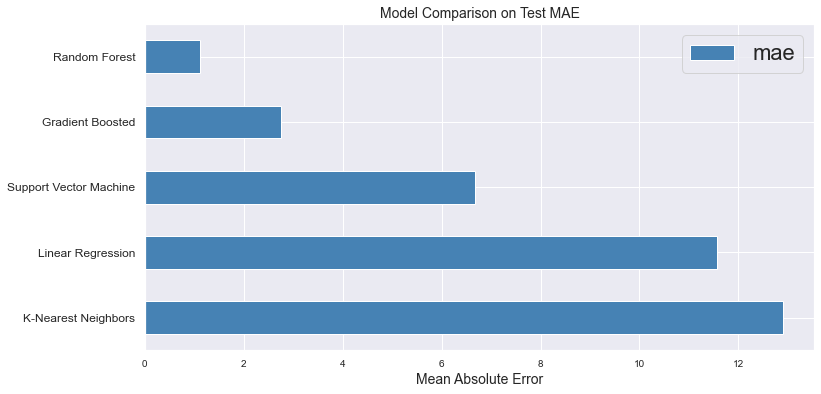

In [79]:
figsize(12, 6)

# Dataframe to contain the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Random Forest',
                                           'Support Vector Machine', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, random_forest_mae, svm_mae,  
                                         gradient_boosted_mae, knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', 
                                                            y = 'mae', 
                                                            kind = 'barh', 
                                                            color ='steelblue')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 12); 
plt.xlabel('Mean Absolute Error', size = 14); 
plt.xticks(size = 10)
plt.title('Model Comparison on Test MAE', size = 14);
plt.savefig('fig06_Model_Comparison');

Depending on the run (the exact results change slightly each time), the random forest regressor performs the best followed by the gradient boosting. I have to admit that this is not the most fair comparison because we are using mostly the default hyperparameters. Especially with the Support Vector Regressor, the hyperparameters have a significant influence on performance. Nonetheless, from these results, we can conclude that machine learning is applicable because all the models significantly outperform the baseline.

## Model Optimization
***
In machine learning, optimizing a model means finding the best set of hyperparameters for a particular problem.

### Hyperparameters
The best way to think about hyperparameters is like the settings of an algorithm that can be adjusted to optimize performance. While model parameters are learned during training, such as the slope and intercept in a linear regression.

In the case of a random forest, hyperparameters include the number of decision trees in the forest and the number of features considered by each tree when splitting a node. The parameters of a random forest are the variables and thresholds used to split each node learned during training. Scikit-Learn implements a set of sensible default hyperparameters for all models, but these are not guaranteed to be optimal for a problem. The best hyperparameters are usually impossible to determine ahead of time, and tuning a model is where machine learning turns from a science into trial-and-error based engineering.

If we optimize the model for the training data, then our model will score very well on the training set, but will not be able to generalize to new data, such as in a test set. When a model performs highly on the training set but poorly on the test set, this is known as overfitting, or essentially creating a model that knows the training set very well but cannot be applied to new problems. 

An overfit model may look impressive on the training set, but will be useless in a real application. Therefore, the standard procedure for hyperparameter optimization accounts for overfitting through cross validation.

### Hyperparameter Tuning with Random Search and Cross Validation
We can choose the best hyperparameters for a model through random search and cross validation.

* **Random Search** refers to the method in which we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.


* **Cross validation** is the method used to assess the performance of the hyperparameters. Rather than splitting the training set up into separate training and validation sets which reduces the amount of training data we can use, we use K-Fold Cross Validation. This means dividing the training data into K folds, and then going through an iterative process where we first train on K-1 of the folds and then evaluate performance on the kth fold. We repeat this process K times so eventually we will have tested on every example in the training data with the key that each iteration we are testing on data that we did not train on. At the end of K-fold cross validation, we take the average error on each of the K iterations as the final performance measure and then train the model on all the training data at once. The performance we record is then used to compare different combinations of hyperparameters.

To look at the available hyperparameters, we can create a random forest and examine the default values.

#### Examine the Default Random Forest to Determine Parameters
We will use these parameters as a starting point. I relied on the sklearn random forest documentation to determine which features to change and the available options

In [80]:
rf = RandomForestRegressor(random_state = 42)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


#### Random Search with Cross Validation
Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.

To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:

In [81]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


Now, we instantiate the random search and fit it like any Scikit-Learn model:

In [82]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X, y);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 194.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 354.2min finished


The most important arguments in RandomizedSearchCV are n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation (we use 100 and 3 respectively). More iterations will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each will increase the run time.

In [83]:
# View the best parameters from fitting the random search
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

**Evaluate Random Search**

In [84]:
# Function to determine if random search yielded a better model
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [85]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X, y)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 1.2990 degrees.
Accuracy = 94.37%.


In [86]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 1.0766 degrees.
Accuracy = 95.14%.


In [87]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.82%.


In [88]:
#  Make predictions on the test set for best model
best_random_pred = best_random.predict(X_test)

print('Best Model Performance on the test set: MAE = %0.4f' % mae(y_test, best_random_pred))

Best Model Performance on the test set: MAE = 1.0766


In [89]:
#  Make predictions on the test set for base model 
base_model_pred = base_model.predict(X_test)

print('Base Model Performance on the test set: MAE = %0.4f' % mae(y_test, base_model_pred))

Base Model Performance on the test set: MAE = 1.2990


We achieved an unspectacular improvement in accuracy of 0.8%. Depending on the application though, this could be a significant benefit. We can further improve our results by using grid search to focus on the most promising hyperparameters ranges found in the random search.

#### Grid Search with Cross Validation
GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define. To use Grid Search, we make another grid based on the best values provided by random search:

In [90]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [91]:
# Fit the grid search to the data
grid_search.fit(X, y);

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 48.0min finished


In [92]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

**Evaluate the Best Model from Grid Search**

In [93]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 11.2363 degrees.
Accuracy = 10.55%.


In [94]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of -88.82%.


It seems like It seems we have about maxed out performance, grid search made our model worse than before. Meaning that we maxed out our performance using Randomized Search CV.

#### Evaluate Final Model on the Test Set
We will use the best model from hyperparameter tuning to make predictions on the testing set. Remember, our model has never seen the test set before, so this performance should be a good indicator of how the model would perform if deployed in the real world. For comparison, we can also look at the performance of the default model. The code below creates the final model, trains it then evaluates on the test set.

In [95]:
# Default model
default_model = base_model

# Select the best model
final_model = best_random

final_model

RandomForestRegressor(max_depth=100, n_estimators=1400, random_state=42)

In [96]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

Default model performance on the test set: MAE = 1.2990.
Final model performance on the test set:   MAE = 1.0766.


The final model does out-perform the baseline model by about 10%, but at the cost of significantly increased running time. Machine learning is often a field of trade-offs: bias vs variance, accuracy vs interpretability, accuracy vs running time, and the final decision of which model to use depends on the situation.

To get a sense of the predictions, we can plot the distribution of true values on the test set and the predicted values on the test set.

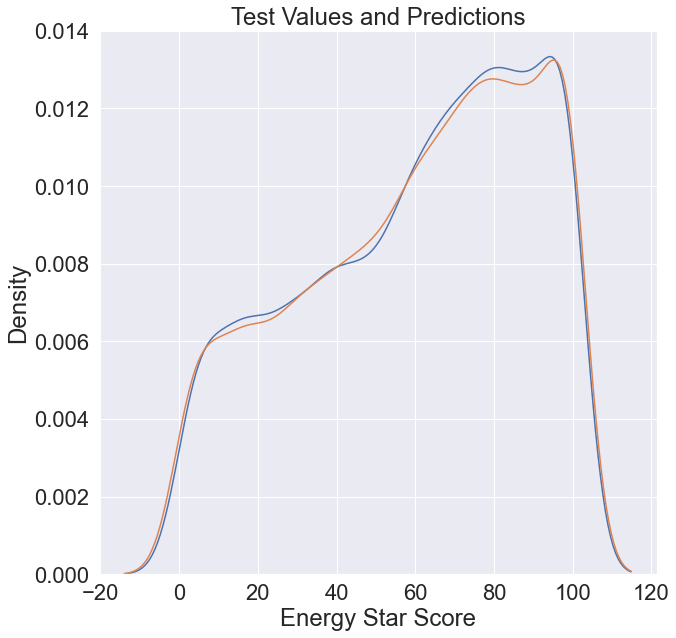

In [97]:
figsize(10, 10)

# Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('Energy Star Score'); plt.ylabel('Density');
plt.title('Test Values and Predictions');
plt.savefig('fig07_Test_Values_and_Predictions');

The distribution looks to be nearly the same although the density of the predicted values is closer to the median of the test values rather than to the actual peak at 100. It appears the model might be less accurate at predicting the extreme values and instead predicts values closer to the median.

Another diagnostic plot is a histogram of the residuals. Ideally, we would hope that the residuals are normally distributed, meaning that the model is wrong the same amount in both directions (high and low).

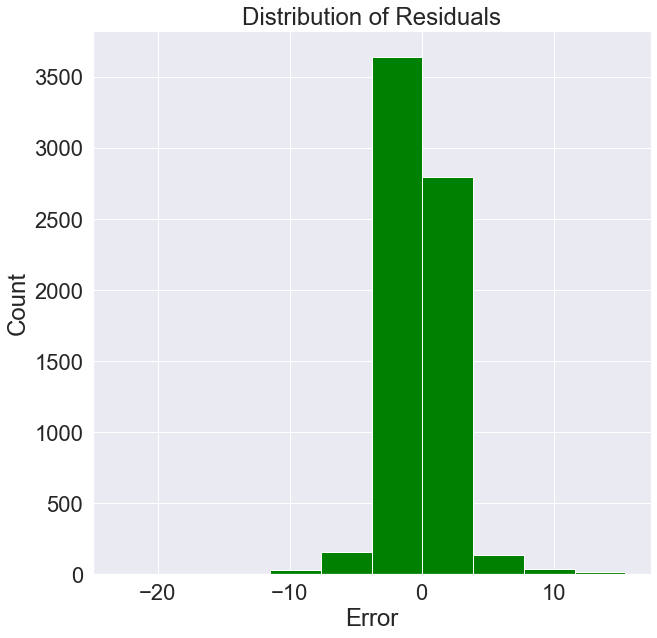

In [98]:
figsize = (4, 4)

# Calculate the residuals 
residuals = final_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'green', bins = 10)
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

The residuals are close to normally distributed, with a few noticeable outliers on the low end. These indicate errors where the model estimate was far below that of the true value.

## Model Interpretation
***
Machine learning is often criticized as being a black-box: we put data in on one side and it gives us the answers on the other. While these answers are often extremely accurate, the model tells us nothing about how it actually made the predictions. This is true to some extent, but there are ways in which we can try and discover how a model "thinks".

Let's explore Feature Importances to interpret our model

### Feature Importance
The main way we can get an understanding of the random forest model is to look at which features it considers most important. The absolute values of the feature importances are not as crucial as the relative ranking of variables. These tell us which varibles are most useful for predicting the Energy Star Score.

In [99]:
# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': list(train_features.columns), 
                                'importance': final_model.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head()

,feature,importance
0,Site EUI (kBtu/ft??),0.679745
1,National Median Site EUI (kBtu/ft??),0.292855
2,Weather Normalized Site Electricity Intensity ...,0.012349
3,Primary Property Type - Self Selected_Residential,0.006508
4,Primary Property Type - Self Selected_Storage,0.002612


The Site Energy Use Intensity, Site EUI (kBtu/ft²), and the Weather Normalized Site Electricity Intensity, Weather Normalized Site Electricity Intensity (kWh/ft²) are the two most important features by quite a large margin. After that, the relative importance drops off considerably which indicates that we might not need to retain all of the features to create a model with nearly the same performance.

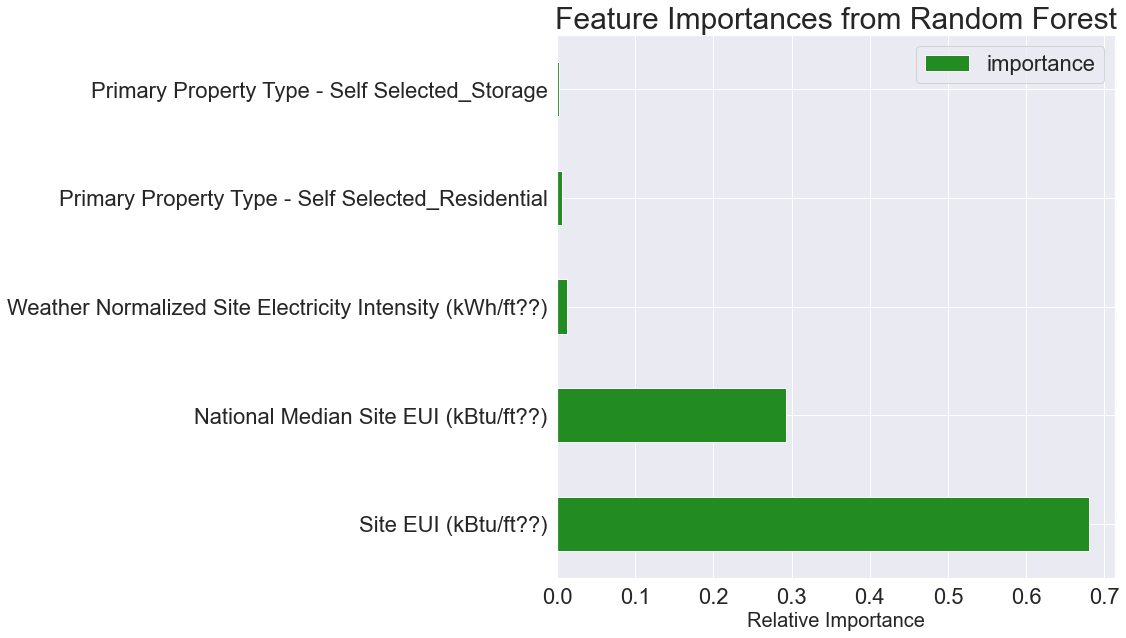

In [101]:
# Plot the 10 most important features in a horizontal bar chart
feature_results.loc[:4, :].plot(x = 'feature', y = 'importance',
                                 kind='barh', color = 'forestgreen');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances from Random Forest', size = 30);
plt.savefig('fig08_Feature_Importances');

### Feature Selection
Let's try using only the 10 most important features in the linear regression to see if performance is improved. We can also limit to these features and re-evaluate the random forest.

In [102]:
# Extract the names of the most important features
most_important_features = feature_results['feature'][:10]

# Find the index that corresponds to each feature name
indices = [list(train_features.columns).index(x) for x in most_important_features]

# Keep only the most important features
X_reduced = X[:, indices]
X_test_reduced = X_test[:, indices]

print('Most important training features shape: ', X_reduced.shape)
print('Most important testing  features shape: ', X_test_reduced.shape)

Most important training features shape:  (15914, 10)
Most important testing  features shape:  (6821, 10)


In [103]:
lr = LinearRegression()

# Fit on full set of features
lr.fit(X, y)
lr_full_pred = lr.predict(X_test)

# Fit on reduced set of features
lr.fit(X_reduced, y)
lr_reduced_pred = lr.predict(X_test_reduced)

# Display results
print('Linear Regression Full Results: MAE =    %0.4f.' % mae(y_test, lr_full_pred))
print('Linear Regression Reduced Results: MAE = %0.4f.' % mae(y_test, lr_reduced_pred))

Linear Regression Full Results: MAE =    11.5575.
Linear Regression Reduced Results: MAE = 11.9147.


Well, reducing the features did not improve the linear regression results. It turns out that the extra information in the features with low importance do actually improve performance.

In [104]:
# Create the model with the same hyperparamters
model_reduced = rf_random.best_estimator_

# Fit and test on the reduced set of features
model_reduced.fit(X_reduced, y)
model_reduced_pred = model_reduced.predict(X_test_reduced)

print('Random Forest Reduced Results: MAE = %0.4f' % mae(y_test, model_reduced_pred))

Random Forest Reduced Results: MAE = 1.0360


In [105]:
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

Final model performance on the test set:   MAE = 1.0766.


By reducing the number of features the model improved to **1.036!**

Lets visualize the Predicted vs Actual Distributions of our final model results

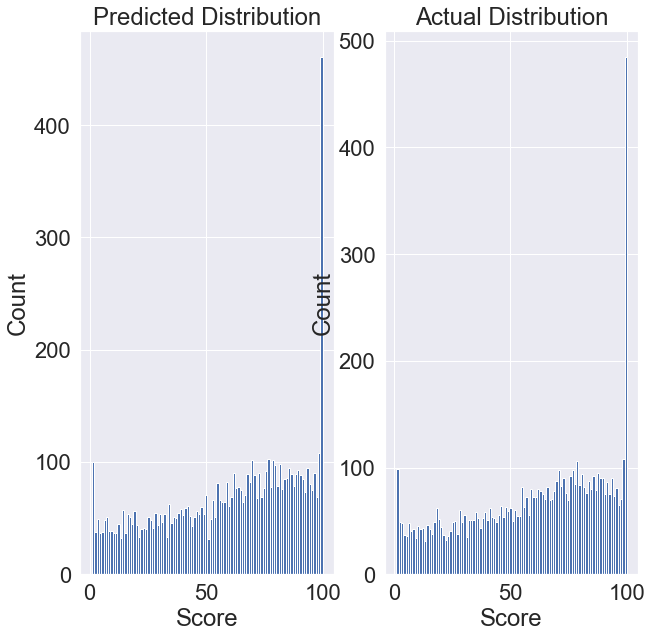

In [106]:
# Plot predictions
ax = plt.subplot(121)
ax.hist(model_reduced_pred, bins = 100)
ax.set_xlabel('Score'); ax.set_ylabel('Count'); 
ax.set_title('Predicted Distribution')

# Plot true values
ax2 = plt.subplot(122)
ax2.hist(y_test, bins = 100)
ax2.set_xlabel('Score'); ax2.set_ylabel('Count'); 
ax2.set_title('Actual Distribution');

The model results have slightly improved with the reduced set of features and we will keep reduce the features for the final model. The desire to reduce the number of features is because we are always looking to build the most parsimonious model: that is, the simplest model with adequate performance. A model that uses fewer features will be faster to train and generally easier to interpret. In this case, reducing the features is helpful because the training time is significant and we can still make interpretations with reduced features.

The overall results of regression show us that it is possible to accurately infer the Energy Star Score of a building given the data available. The model results are not easily explained, but the most important features are in line with those found to be correlated with the Energy Star Score.

## Extra Work

### Predicting Scores of New Buildings
Now we can use the model to generate new predictions for the buildings with missing scores.

#### Missing Scores Regression Preprocessing

In [107]:
# Remove correlations from the dataframe that are above corr_val
def corr_df(x, corr_val):
     # Dont want to remove correlations between Energy Star Score
    y = x['ENERGY STAR Score']
    x = x.drop(columns = ['ENERGY STAR Score'])
    
    # Matrix of all correlations
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through all correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            # If correlation is above the threshold, add to list to remove
            if val >= corr_val:
                drop_cols.append(col.values[0])

    # Remove collinear variables
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Site EUI (kBtu/ft??)'])
    
    # Make sure to add the label back in to the data
    x['ENERGY STAR Score'] = y
    
    return x

In [108]:
new_data = corr_df(df, corr_val = 0.5)
print('Old Data Shape:', df.shape)
print('New Data Shape with correlated features removed', new_data.shape)

<ipython-input-107-0eb714b8fb10>:20: RuntimeWarning: invalid value encountered in greater_equal
  if val >= corr_val:


Old Data Shape: (27192, 109)
New Data Shape with correlated features removed (27192, 77)


In [109]:
# Takes in a dataframe with observations for each building
# Returns all the data needed for training and testing a regression model
def train_test_reg(df):

    # Select the numerical columns
    X = df.select_dtypes('number')
    
    # Add the selected categorical columns
    X['Primary Property Type - Self Selected'] = df['Primary Property Type - Self Selected']
    X['Borough'] = df['Borough']
    
    # One-hot encoding of categorical values
    X = pd.get_dummies(X)
    
    # Extract the buildings with no score
    missing_scores = X[X['ENERGY STAR Score'].isnull()]
    
    # Drop the missing scores from the data
    X = X.dropna(subset = ['ENERGY STAR Score'])
    
    # Remove the labels from the features
    y = X['ENERGY STAR Score']
    X = X.drop(columns = ['Property Id', 'ENERGY STAR Score'])
    
    missing_scores = missing_scores.drop(columns = ['Property Id', 
                                                    'ENERGY STAR Score'])
    
    # Feature names will be used for later interpretation
    feature_names = list(X.columns)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size = 0.30, 
                                                        random_state = 42)
    
    # Impute missing values using a median strategy
    imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)
    missing_scores = imputer.transform(missing_scores)
    
    # Return all data
    return X_train, X_test, y_train, y_test, missing_scores, feature_names

In [110]:
X_train, X_test, y_train, y_test, missing_scores, feature_names = train_test_reg(new_data)
print('Training Data Shape:', X_train.shape)
print('Testing Data Shape:', X_test.shape)

Training Data Shape: (15914, 38)
Testing Data Shape: (6821, 38)


In [111]:
# Create and train random forest
rf_reg = RandomForestRegressor(n_estimators=200, n_jobs=-1)
rf_reg.fit(X_train, y_train)

# Make predicitons and evaluate
rf_reg_pred = rf_reg.predict(X_test)

print('Random Forest Error: {:0.4f}.'.format(np.mean(abs(rf_reg_pred - y_test))))

Random Forest Error: 3.7084.


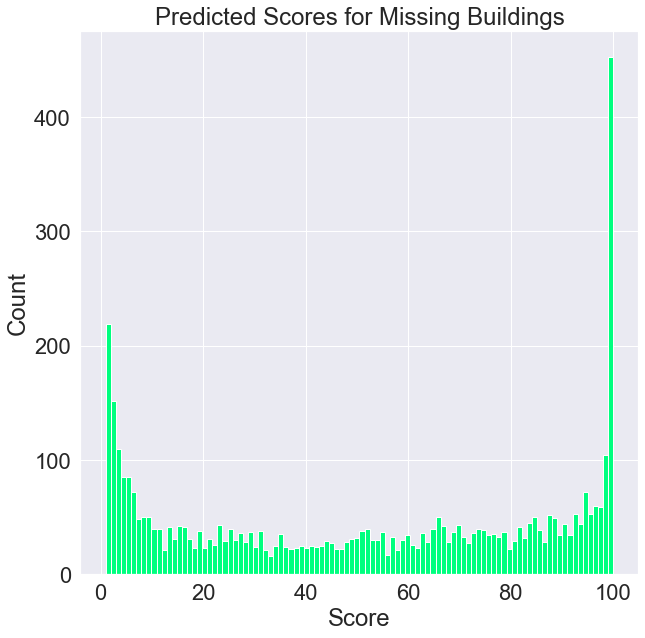

In [112]:
# Predict for the buildings missing energy star scores
missing_preds = rf_reg.predict(missing_scores)

# Distribution of predicted scores
plt.hist(missing_preds, bins = 100, color = 'springgreen');
plt.xlabel('Score'); plt.ylabel('Count'); 
plt.title('Predicted Scores for Missing Buildings');
plt.savefig('fig09_Missing_Scores');

Our model can now make a prediction for any new building as long as it has the measurements recorded in the original data. We can use this trained model to infer the score and we know that our estimate should be within 10 points of the true value.

### Classification of Energy Star Scores
As an additional exercise, we can see if it is possible to place buildings into classes based on their energy star scores. We will use a simple grading scheme where every 20 point interval is a grade giving us 5 total.

#### Classification Preprocessing

In [113]:
# Function to generate a training and testing dataset for classification
# Codes the energy star score in 5 unique classes
def train_test_clf(df):

    # Select numeric columns
    X = df.select_dtypes('number')
    
    # Add in specific categorical columns
    X['Primary Property Type - Self Selected'] = df['Primary Property Type - Self Selected']
    X['Borough'] = df['Borough']
    
    # One Hot Encoding of Categorical Variables
    X = pd.get_dummies(X)
    
    # Save the buildings with missing scores
    missing_scores = X[X['ENERGY STAR Score'].isnull()]
    X = X.dropna(subset = ['ENERGY STAR Score'])
    
    # Assign a grade based on energy star score
    X['grade'] = pd.cut(X['ENERGY STAR Score'], bins = range(0, 101, 20), labels = ['Poor', 
                                                                                    'Fair', 
                                                                                    'Average', 
                                                                                    'Good', 
                                                                                    'Excellent'])
    
    y = X['grade']
    
    # Drop labels from training data
    X = X.drop(columns = ['Property Id', 'ENERGY STAR Score', 'grade'])
    missing_scores = missing_scores.drop(columns = ['Property Id', 'ENERGY STAR Score'])
    feature_names = list(X.columns)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    
    # Impute the missing values using a median strategy
    imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)
    missing_scores = imputer.transform(missing_scores)
    
    return X_train, X_test, y_train, y_test, missing_scores, feature_names

In [114]:
X_train, X_test, y_train, y_test, missing_scores, feature_names = train_test_clf(new_data)

# Look at value counts of grades
pd.Series(y_train).value_counts()

Excellent    5195
Good         4128
Average      3183
Fair         2289
Poor         2256
Name: grade, dtype: int64

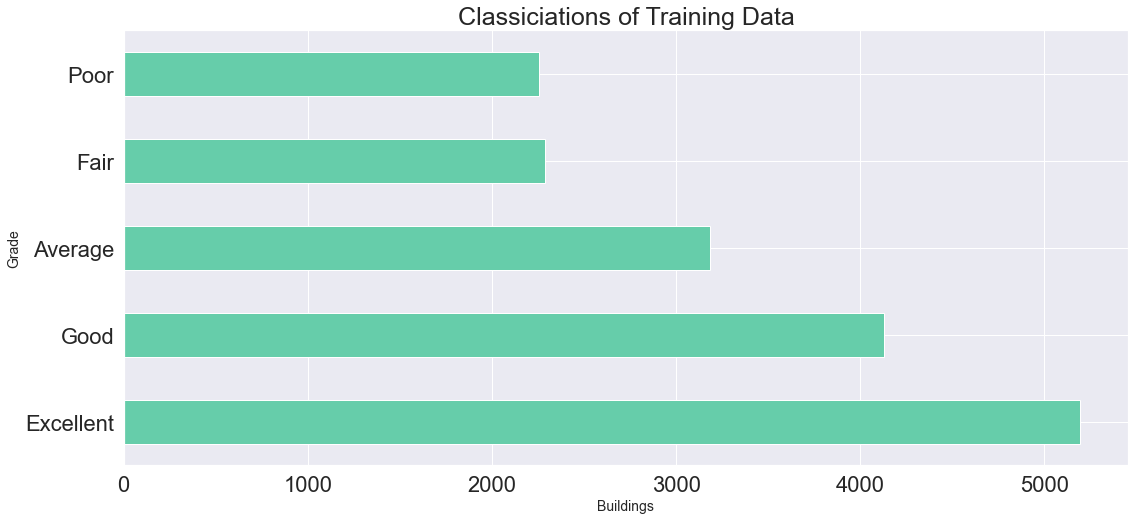

In [115]:
fig,ax = plt.subplots(figsize = (18,8)) 
x = pd.Series(y_train).value_counts()
x.plot.barh(color = 'mediumaquamarine')
plt.title('Classiciations of Training Data', fontsize = 25)
plt.xlabel('Buildings', size=14)
plt.ylabel('Grade', size=14)
plt.savefig('fig10_Classification_Grade');

The most common 'grade' for a building is an 'Excellent' and the least common is an 'Poor'. The skew towards higher energy star scores is visible once again.

**Random Forest Classifier**

In [116]:
# Create and train the classifier
rf_clf = RandomForestClassifier(n_estimators=200)
rf_clf.fit(X_train, y_train)

# Make predictions
rf_clf_pred = rf_clf.predict(X_test)

**Interpret Classification Results**

There are many metrics to use for classification. Here we will use accuracy, the f1 score, and the confusion matrix. We will use the weighted average parameter for the f1 score to account for the class imbalances. The confusion matrix allows us to see what errors our classifier makes.

In [117]:
# Function to plot a confusion matrix
# Includes the numbers of each classification on the plot
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    
    # Normalize the counts
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plot the confusion matrix as an image
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 22)
    
    # Tick marks show the labels
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    # Add the numbers to the plot
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", size = 18,
                 color="white" if cm[i, j] > thresh else "black")

    # Formatting
    plt.tight_layout()
    plt.xticks(size = 18)
    plt.yticks(size = 18)
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)
    
# Function the evalute classifications from a model
def evaluate_classifications(true, predictions):
    # Metrics for classifications
    accuracy = np.mean(true == predictions)
    f1_value = f1_score(true, predictions, average='weighted')
    cm = confusion_matrix(true, predictions)
    
    print('Accuracy: {:0.2f}.'.format(accuracy))
    print('F1 score: {:0.2f}.'.format(f1_value))
    
    plot_confusion_matrix(cm, classes = sorted(set(true)))

Accuracy: 0.76.
F1 score: 0.75.


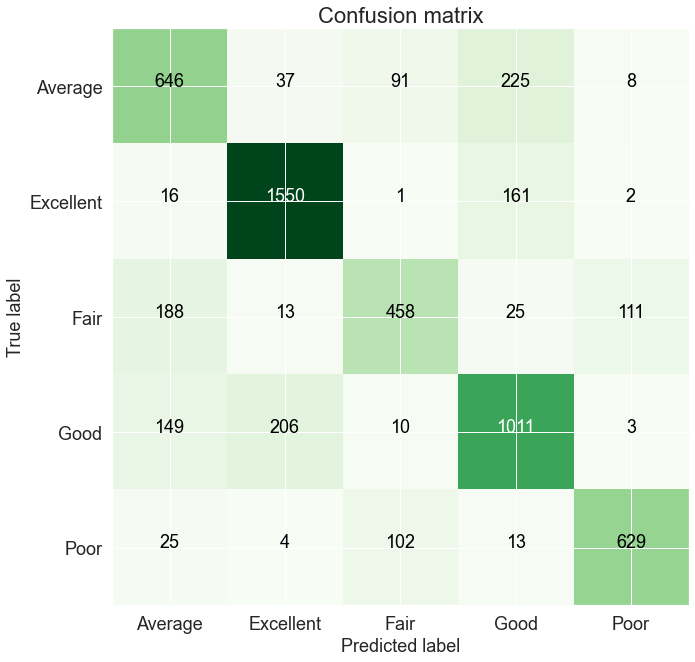

In [118]:
evaluate_classifications(y_test, rf_clf_pred)

Accuracy is a straightforward metric and it shows that our model can correctly choose among the five classes 75% of the time. The confusion matrix is useful because it shows the model mistakes. The most common mistakes are predicting an 'Excellent' when the true label was a 'Good', and predicting a 'Good' when the true label was a 'Average'. The random forest classifier appears to do very well and can accurately infer the Energy Star Score of a building if provided with the building data.

#### Predicted Classifications of New Data

The classifier can also be used to assign grades to the buildings which were missing a score. We do not have the true values for these buildings, but we can at least look at the distribution of predictions.

In [119]:
missing_classes = rf_clf.predict(missing_scores)

pd.Series(missing_classes).value_counts()

Excellent    1615
Poor         1329
Good          650
Average       505
Fair          358
dtype: int64

Text(0, 0.5, 'Grade')

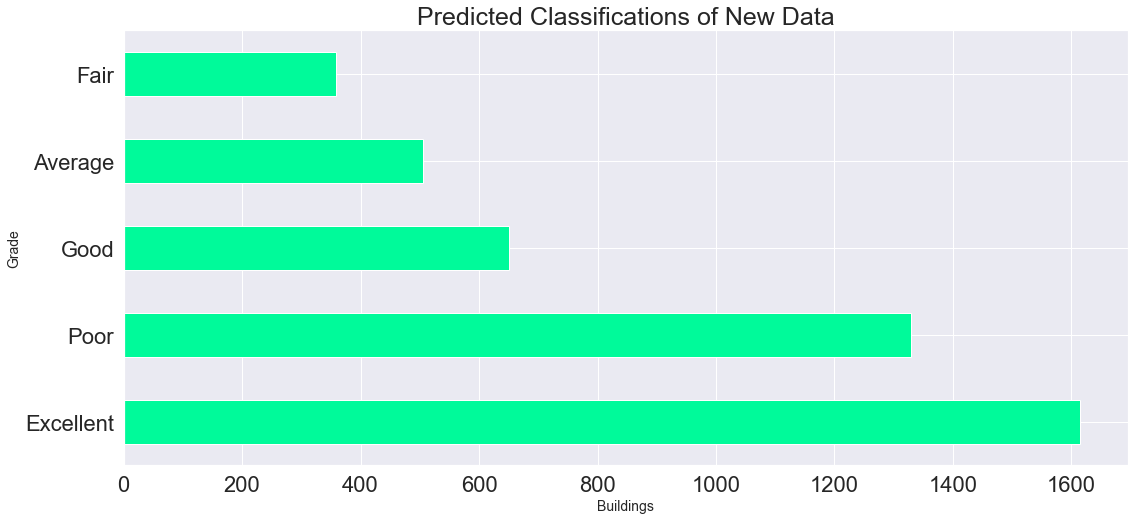

In [120]:
fig,ax = plt.subplots(figsize = (18,8)) 
x = pd.Series(missing_classes).value_counts()
x.plot.barh(color = 'mediumspringgreen')
plt.title('Predicted Classifications of New Data', fontsize = 25)
plt.xlabel("Buildings", size=14)
plt.ylabel("Grade", size=14)

Any new building can now be classified by the model as long as it is provided with the appropriate data. We can be confident in the predictions of the model as shown by the high performance on the testing data.

## Conclusions
***
We set out to answer the question: Can we build a model to predict the Energy Star Score of a building and what variables provide us the most information about the score? Given the exploration in this notebook, I conclude that yes, we can create a model to accurately infer the Energy Star Score of a building and we have determined that the Site Energy Use Intensity, the Electricity Intensity, and the Property Type are the most useful measures for determining the energy star score.

The highlights from the report are:

* Energy Star Score might not be the most accurate measure of a buildings overall energy efficiency
* Disproportionate number of buildings have either 1 or 100 energy star scores
* Site EUI is more normally distributed and might be a more objective measure
* Regression and Classification both are able to produce reasonable predictions for Energy Star Score
* The most useful random forest features for predicting Energy Star Score are EUI, Property Type, and Electricity usage
* Finally I was able to classify the buildings into 5 grades as well as predict the score of buildings with missing scores.

### Recommendations & Future Work
***
In this project we analyzed the energy usage of buildings in New York City. From the heat map of the correlation matrix we can see that the Energy Star score is negatively correlated with Energy usage intensity. This makes sense as the energy star score is a measure of energy efficiency of the building. The energy usage intensity has a strong positive correlation to the natural gas usage intensity. We can see that natural gas usage intensity and electricity usage intensity are uncorrelated. This implies we could replace one with the other. Therefore reducing natural gas consumption or replacing it with electricity could be the best answer to reducing energy usage intensity and green house gas emissions.

Since natural gas usage intensity is most highly correlated with energy usage intensity reducing it could improve building energy efficiency and reduce green house gas emissions. Some ways to reduce natural gas consumption include:

* Investing in more efficient heating and cooling services or slightly reducing the usage of either heating or cooling during the day when most people are not home. This is especially important in large buildings as HVAC systems have a larger volume of air to heat/cool.

* Another option is to reuse waste heat, such as reusing the vented air from electric clothes dryers, however, filtering and the air will be necessary and could alter the cost effectiveness of this approach.

* Replacing gas powered appliances such as stoves with more efficient electric ones is another option. However, the source of electric power should also be considered to weigh the overall energy efficiency and environmental impact.


### Future Work

This report also identified areas for follow-up. These include finding an objective measurement of overall building energy performance and determining why the Energy Star Score distributions vary between building types.

I originally attempted to clean and analyze this data set to try to find ways to reduce buildings' energy usage and subsequently their green house gas emissions. After this project I thought it might be interesting to see if I could predict the emission of green house gases from buildings using a time series model.